# Ecommerence_Churn_Prediction

## Problem Statement
**A customer moving out of the platform or someone who stops using the platform is considered a churned-out customer. If there is no transaction from a customer for a specific period, it is assumed that they have moved out of the platform; however, this time window may vary from industry to industry, e.g., for a grocery firm, this window could be small, ~1 month. On the other hand, for an e-commerce firm with multiple categories, for example, it could be ~6 months for Flipkart/Amazon. For retailkart.com, this period is 3 months.**


## Objectives:-
**The objective of predicting customers who will churn would be to offer them a TOA (token of appreciation) and prevent them from churning out.**
**We should be able to identify more customers with a probability of churn, i.e., recall should be high, but not at the cost of introducing many false positives.**
**In this case, the F1 score is an important metric. Remember that the F1 score ranges between 0 and 1 and would be directly proportional to the business impact.**

In [497]:
# Importing necessary libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Reading and Understanding dataset

In [498]:
# Loading CustomerPurchaseDat dataset
df = pd.read_csv('User+App+Behaviour.csv')
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0         Mobile Phone         3              6.0   
1       50002      1     NaN                Phone         1              8.0   
2       50003      1     NaN                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0           Debit Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2           Debit Card    Male             2.0                         4   
3           Debit Card    Male             2.0                         4   
4                   CC    Male             NaN                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1              Mobile                  3        Single                7   
2              Mobile                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4              Mobile                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

In [499]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [500]:
df.shape

(5630, 20)

In [501]:
df.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5366.000000  5630.000000      5379.000000   
mean   52815.500000     0.168384    10.189899     1.654707        15.639896   
std     1625.385339     0.374240     8.557241     0.915389         8.531475   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     2.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    16.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5375.000000               5630.000000        5630.000000   
mean         2.931535                  3.688988           3.066785   
std          0.721926                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5365.000000  5374.000000   
mean          4.214032     0.284902                    15.707922     1.751023   
std           2.583586     0.451408                     3.675485     1.894621   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5372.000000        5323.000000     5630.000000  
mean      3.008004           4.543491      177.221492  
std       2.939680           3.654433       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

#### **Insights:**
- **The dataset contains 5630 rows and 20 columns.**
- **As we can see from df.info() 7 Columns have missing values.**

## Exporatory Data Analysis And Feature Engineering

In [502]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

### MIssing value Treatment

In [503]:
df.isnull().sum().sort_values(ascending=False)

DaySinceLastOrder              307
OrderAmountHikeFromlastYear    265
Tenure                         264
OrderCount                     258
CouponUsed                     256
HourSpendOnApp                 255
WarehouseToHome                251
CustomerID                       0
MaritalStatus                    0
Complain                         0
NumberOfAddress                  0
PreferedOrderCat                 0
SatisfactionScore                0
Churn                            0
NumberOfDeviceRegistered         0
Gender                           0
PreferredPaymentMode             0
CityTier                         0
PreferredLoginDevice             0
CashbackAmount                   0
dtype: int64

In [504]:
((df.isnull().sum()/df.shape[0])*100).round(2).sort_values(ascending=False)

DaySinceLastOrder              5.45
OrderAmountHikeFromlastYear    4.71
Tenure                         4.69
OrderCount                     4.58
CouponUsed                     4.55
HourSpendOnApp                 4.53
WarehouseToHome                4.46
CustomerID                     0.00
MaritalStatus                  0.00
Complain                       0.00
NumberOfAddress                0.00
PreferedOrderCat               0.00
SatisfactionScore              0.00
Churn                          0.00
NumberOfDeviceRegistered       0.00
Gender                         0.00
PreferredPaymentMode           0.00
CityTier                       0.00
PreferredLoginDevice           0.00
CashbackAmount                 0.00
dtype: float64

In [505]:
### Missing Value Imputation for 'DaySinceLastOrder' with median

median=df['DaySinceLastOrder'].median()

df['DaySinceLastOrder'].fillna(median,inplace=True)
df['DaySinceLastOrder'].isnull().sum()

0

In [506]:
### Null value treatment for OrderAmountHikeFromlastYear column with median
mean=round(df['OrderAmountHikeFromlastYear'].mean())

df['OrderAmountHikeFromlastYear'].fillna(mean,inplace=True)
df['OrderAmountHikeFromlastYear'].isnull().sum()


0

In [507]:
### Null value treatment for Tenure column with median
median=round(df['Tenure'].median())


df['Tenure'].fillna(median,inplace=True)
df['Tenure'].isnull().sum()

0

In [508]:
### Null value treatment for OrderCount column with mean
median=df['OrderCount'].median()


df['OrderCount'].fillna(median,inplace=True)
df['OrderCount'].isnull().sum()

0

In [509]:
### Null value treatment for CouponUsed column with mean
median=df['CouponUsed'].median()


df['CouponUsed'].fillna(median,inplace=True)
df['CouponUsed'].isnull().sum()

0

In [510]:
### Null value treatment for WarehouseToHome column with mean
median=df['WarehouseToHome'].median()


df['WarehouseToHome'].fillna(median,inplace=True)
df['WarehouseToHome'].isnull().sum()

0

In [511]:
### Null value treatment for HourSpendOnApp column with mean
median=df['HourSpendOnApp'].median()


df['HourSpendOnApp'].fillna(median,inplace=True)
df['HourSpendOnApp'].isnull().sum()

0

### Insights:-
- **we have imputed null value columns with with their mean/median**

#### Now will check the DataType of all Cloumns 

In [512]:
df.dtypes

CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered         int64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                   int64
dtype: object

- **All the  data types are correct in this dataset.**
- **And now there is no null Values present in dataset**

In [513]:
## Check for duplicates
sum(df.duplicated(subset='CustomerID'))


0

##### There is no duplicate entry in this dataset 

In [514]:
df.shape

(5630, 20)

In [515]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5630 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5630 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5630 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

In [516]:
## Grouping categorical/object and Numerical columns 
cat_col = df.select_dtypes(include='object')
num_col = df.select_dtypes(exclude ='object')

In [517]:
cat_col

PreferredLoginDevice PreferredPaymentMode  Gender    PreferedOrderCat  \
0            Mobile Phone           Debit Card  Female  Laptop & Accessory   
1                   Phone                  UPI    Male              Mobile   
2                   Phone           Debit Card    Male              Mobile   
3                   Phone           Debit Card    Male  Laptop & Accessory   
4                   Phone                   CC    Male              Mobile   
...                   ...                  ...     ...                 ...   
5625             Computer          Credit Card    Male  Laptop & Accessory   
5626         Mobile Phone          Credit Card    Male             Fashion   
5627         Mobile Phone           Debit Card    Male  Laptop & Accessory   
5628             Computer          Credit Card    Male  Laptop & Accessory   
5629         Mobile Phone          Credit Card    Male  Laptop & Accessory   

     MaritalStatus  
0           Single  
1           Single  
2           Single  
3           Single  
4           Single  
...            ...  
5625       Married  
5626       Married  
5627       Married  
5628       Married  
5629       Married  

[5630 rows x 5 columns]

In [518]:
num_col

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  HourSpendOnApp  \
0          50001      1     4.0         3              6.0             3.0   
1          50002      1     9.0         1              8.0             3.0   
2          50003      1     9.0         1             30.0             2.0   
3          50004      1     0.0         3             15.0             2.0   
4          50005      1     0.0         1             12.0             3.0   
...          ...    ...     ...       ...              ...             ...   
5625       55626      0    10.0         1             30.0             3.0   
5626       55627      0    13.0         1             13.0             3.0   
5627       55628      0     1.0         1             11.0             3.0   
5628       55629      0    23.0         3              9.0             4.0   
5629       55630      0     8.0         1             15.0             3.0   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
0                            3                  2                9         1   
1                            4                  3                7         1   
2                            4                  3                6         1   
3                            4                  5                8         0   
4                            3                  5                3         0   
...                        ...                ...              ...       ...   
5625                         2                  1                6         0   
5626                         5                  5                6         0   
5627                         2                  4                3         1   
5628                         5                  4                4         0   
5629                         2                  3                4         0   

      OrderAmountHikeFromlastYear  CouponUsed  OrderCount  DaySinceLastOrder  \
0                            11.0         1.0         1.0                5.0   
1                            15.0         0.0         1.0                0.0   
2                            14.0         0.0         1.0                3.0   
3                            23.0         0.0         1.0                3.0   
4                            11.0         1.0         1.0                3.0   
...                           ...         ...         ...                ...   
5625                         18.0         1.0         2.0                4.0   
5626                         16.0         1.0         2.0                3.0   
5627                         21.0         1.0         2.0                4.0   
5628                         15.0         2.0         2.0                9.0   
5629                         13.0         2.0         2.0                3.0   

      CashbackAmount  
0                160  
1                121  
2                120  
3                134  
4                130  
...              ...  
5625             151  
5626             225  
5627             186  
5628             179  
5629             169  

[5630 rows x 15 columns]

In [519]:
num_col.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.566785   
std     1625.385339     0.374240     8.357951     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.934636                  3.688988           3.066785   
std          0.705528                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.721670     1.716874   
std           2.583586     0.451408                     3.588459     1.857640   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      2.961812           4.459325      177.221492  
std       2.879248           3.570626       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

#### Now lets deal with categorical columns 


In [520]:
cat_col.columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [521]:
df['PreferredLoginDevice'].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

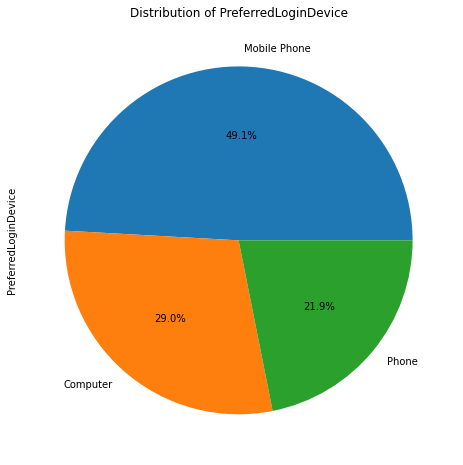

In [522]:
### Now Visualise the distribution of PreferredLoginDevice columns
cat_col['PreferredLoginDevice'].value_counts().plot.pie(y='PreferredLoginDevice',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferredLoginDevice')
plt.show()

In [523]:
### Here Mobile phone and phone belong to same category but they are mentioned seperate so will make them as 1 category


df['PreferredLoginDevice'].loc[df['PreferredLoginDevice']=='Mobile Phone']='Phone'

In [524]:
df['PreferredLoginDevice'].value_counts()

Phone       3996
Computer    1634
Name: PreferredLoginDevice, dtype: int64

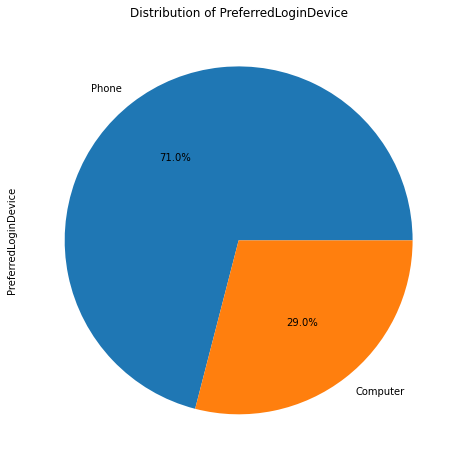

In [525]:
### Now Visualise the distribution of PreferredLoginDevice columns
df['PreferredLoginDevice'].value_counts().plot.pie(y='PreferredLoginDevice',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferredLoginDevice')
plt.show()

In [526]:
df['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

- **Here CC refers to Credit Card we have that as a category**
- **So we combining credit card , debit card and cc as Card**
- **Also COD and cash on Delivery are same**

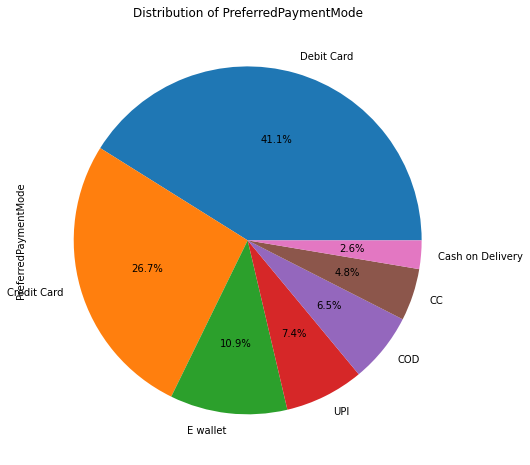

In [527]:
### Now Visualise the distribution of PreferredPaymentMode columns
df['PreferredPaymentMode'].value_counts().plot.pie(y='PreferredPaymentMode',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferredPaymentMode')
plt.show()

In [528]:
df['PreferredPaymentMode'].loc[df['PreferredPaymentMode']=='Debit Card']='Card'
df['PreferredPaymentMode'].loc[df['PreferredPaymentMode']=='Credit Card']='Card'
df['PreferredPaymentMode'].loc[df['PreferredPaymentMode']=='CC']='Card'

In [529]:
df['PreferredPaymentMode'].loc[df['PreferredPaymentMode']=='COD']='Cash on Delivery'

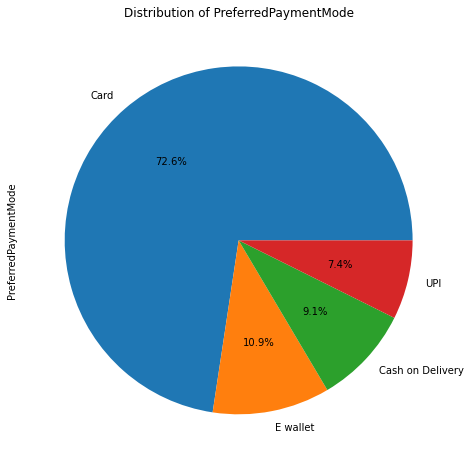

In [530]:
### Now Visualise the distribution of PreferredPaymentMode columns
df['PreferredPaymentMode'].value_counts().plot.pie(y='PreferredPaymentMode',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferredPaymentMode')
plt.show()

In [531]:
df['Gender'].value_counts()


Male      3384
Female    2246
Name: Gender, dtype: int64

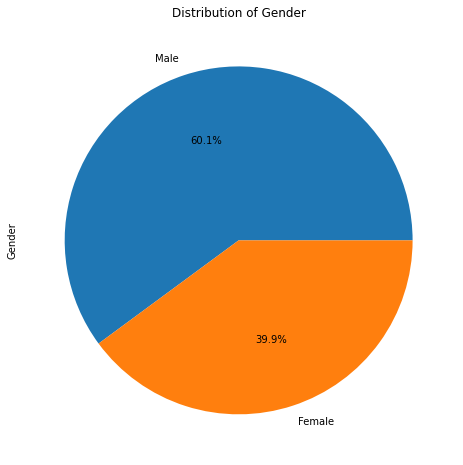

In [532]:
### Now Visualise the distribution of Gender columns
df['Gender'].value_counts().plot.pie(y='Gender',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of Gender')
plt.show()

In [533]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

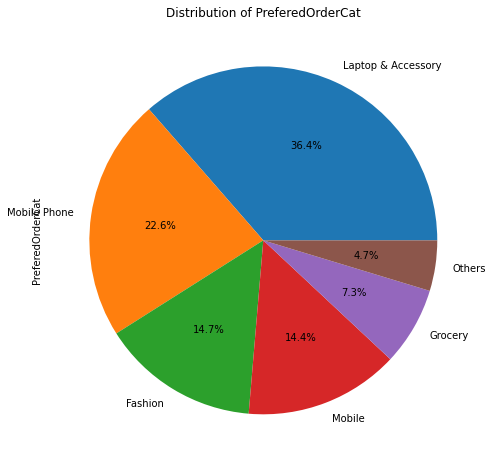

In [534]:
### Now Visualise the distribution of PreferedOrderCat columns
df['PreferedOrderCat'].value_counts().plot.pie(y='PreferedOrderCat',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferedOrderCat')
plt.show()

In [535]:
df['PreferedOrderCat'].loc[df['PreferedOrderCat']=='Mobile']='Phone'

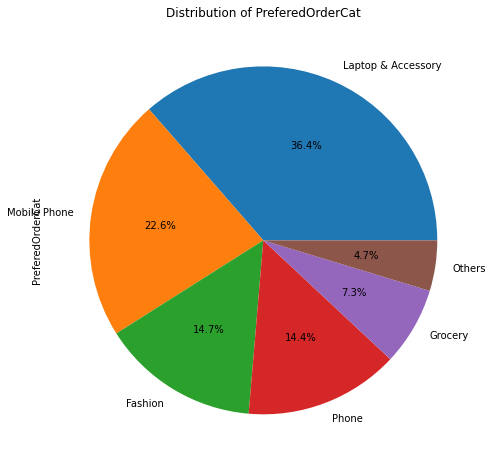

In [536]:
### Now Visualise the distribution of PreferedOrderCat columns
df['PreferedOrderCat'].value_counts().plot.pie(y='PreferedOrderCat',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of PreferedOrderCat')
plt.show()

In [537]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Phone                  809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [538]:
df['MaritalStatus'].value_counts()

Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

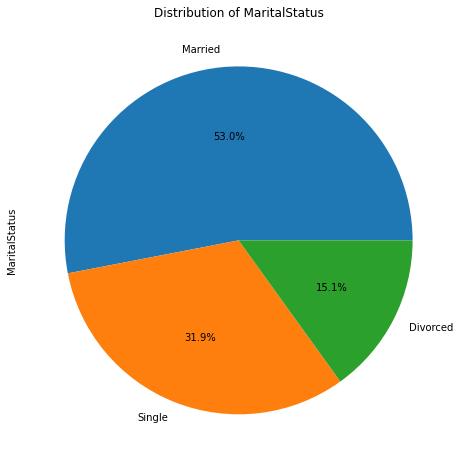

In [539]:
### Now Visualise the distribution of MaritalStatus columns
df['MaritalStatus'].value_counts().plot.pie(y='MaritalStatus',autopct='%1.1f%%',figsize=(8,8))
plt.title('Distribution of MaritalStatus')
plt.show()

- **Insights:-**
- **70% 0f customer prefer Mobile phpne As PreferredLoginDevice**
- **Here 70%+  customer prefer Card as PreferredPaymentMode**
- **There is a  60:40 in Gender**
- **50%+ of customer are married and 30%+ customers are single**
- **70%+ order is coming only from Mobile and laptop&acc**


In [540]:
cat_col.columns

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

**Now that we handled all the Categorical columns we check Numerical columns**

In [541]:
num_col.describe()

CustomerID        Churn       Tenure     CityTier  WarehouseToHome  \
count   5630.000000  5630.000000  5630.000000  5630.000000      5630.000000   
mean   52815.500000     0.168384    10.134103     1.654707        15.566785   
std     1625.385339     0.374240     8.357951     0.915389         8.345961   
min    50001.000000     0.000000     0.000000     1.000000         5.000000   
25%    51408.250000     0.000000     3.000000     1.000000         9.000000   
50%    52815.500000     0.000000     9.000000     1.000000        14.000000   
75%    54222.750000     0.000000    15.000000     3.000000        20.000000   
max    55630.000000     1.000000    61.000000     3.000000       127.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     5630.000000               5630.000000        5630.000000   
mean         2.934636                  3.688988           3.066785   
std          0.705528                  1.023999           1.380194   
min          0.000000                  1.000000           1.000000   
25%          2.000000                  3.000000           2.000000   
50%          3.000000                  4.000000           3.000000   
75%          3.000000                  4.000000           4.000000   
max          5.000000                  6.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear   CouponUsed  \
count      5630.000000  5630.000000                  5630.000000  5630.000000   
mean          4.214032     0.284902                    15.721670     1.716874   
std           2.583586     0.451408                     3.588459     1.857640   
min           1.000000     0.000000                    11.000000     0.000000   
25%           2.000000     0.000000                    13.000000     1.000000   
50%           3.000000     0.000000                    15.000000     1.000000   
75%           6.000000     1.000000                    18.000000     2.000000   
max          22.000000     1.000000                    26.000000    16.000000   

        OrderCount  DaySinceLastOrder  CashbackAmount  
count  5630.000000        5630.000000     5630.000000  
mean      2.961812           4.459325      177.221492  
std       2.879248           3.570626       49.193869  
min       1.000000           0.000000        0.000000  
25%       1.000000           2.000000      146.000000  
50%       2.000000           3.000000      163.000000  
75%       3.000000           7.000000      196.000000  
max      16.000000          46.000000      325.000000

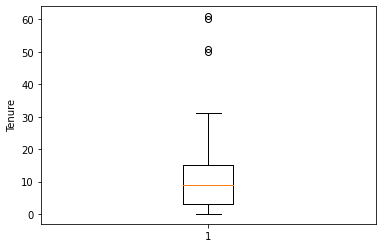

In [542]:
### dataset not contains any outliers but will check by ploting them

plt.boxplot(num_col['Tenure'])
plt.ylabel("Tenure")
plt.show()

**Tenure is Tenure of customer in organisation it can 60 months so cannot consider them as Outliers**

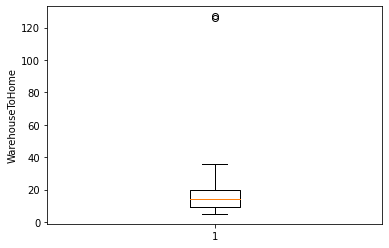

In [543]:
plt.boxplot(num_col['WarehouseToHome'])
plt.ylabel("WarehouseToHome")
plt.show()

In [544]:
distance = df[df['WarehouseToHome']>= 40]
distance

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  \
1309       51310      0    25.0             Computer         3   
4124       54125      0    26.0             Computer         3   

      WarehouseToHome PreferredPaymentMode Gender  HourSpendOnApp  \
1309            126.0                 Card   Male             2.0   
4124            127.0                 Card   Male             3.0   

      NumberOfDeviceRegistered PreferedOrderCat  SatisfactionScore  \
1309                         3            Phone                  1   
4124                         4     Mobile Phone                  1   

     MaritalStatus  NumberOfAddress  Complain  OrderAmountHikeFromlastYear  \
1309       Married                3         0                         15.0   
4124       Married                4         0                         16.0   

      CouponUsed  OrderCount  DaySinceLastOrder  CashbackAmount  
1309         1.0         1.0                0.0             135  
4124         2.0         2.0                1.0             160

In [545]:
df['CityTier'].value_counts()

1    3666
3    1722
2     242
Name: CityTier, dtype: int64

**Here there are entries which looks like outlier but This Ecommerce Delivered before so it cannot be an outlier**

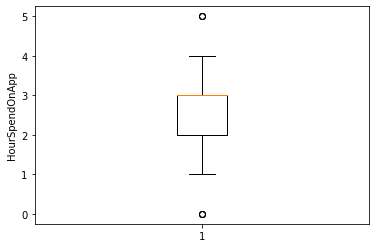

In [546]:
plt.boxplot(num_col['HourSpendOnApp'])
plt.ylabel("HourSpendOnApp")
plt.show()

In [547]:
df['HourSpendOnApp'].value_counts()

3.0    2942
2.0    1471
4.0    1176
1.0      35
0.0       3
5.0       3
Name: HourSpendOnApp, dtype: int64

**These are not considered as outliers**

In [548]:
num_col.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [549]:
df['NumberOfDeviceRegistered'].value_counts()

4    2377
3    1699
5     881
2     276
1     235
6     162
Name: NumberOfDeviceRegistered, dtype: int64

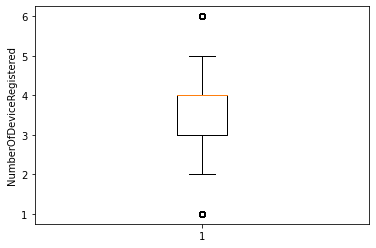

In [550]:
plt.boxplot(num_col['NumberOfDeviceRegistered'])
plt.ylabel("NumberOfDeviceRegistered")
plt.show()

In [551]:
df['NumberOfAddress'].value_counts()

2     1369
3     1278
4      588
5      571
6      382
1      371
8      280
7      256
9      239
10     194
11      98
19       1
21       1
20       1
22       1
Name: NumberOfAddress, dtype: int64

In [552]:
df['NumberOfAddress'].describe()

count    5630.000000
mean        4.214032
std         2.583586
min         1.000000
25%         2.000000
50%         3.000000
75%         6.000000
max        22.000000
Name: NumberOfAddress, dtype: float64

In [553]:
np.percentile(df['NumberOfAddress'], [0,50,75,90,95,99,100])

array([ 1.,  3.,  6.,  8., 10., 11., 22.])

In [554]:
## Here will keep till 11, because there are very  few entries for 11+ address
percentile_99 = df['NumberOfAddress'].quantile(0.99)

# Impute outliers with the 99th percentile value
df.loc[df['NumberOfAddress'] > percentile_99, 'NumberOfAddress'] = percentile_99

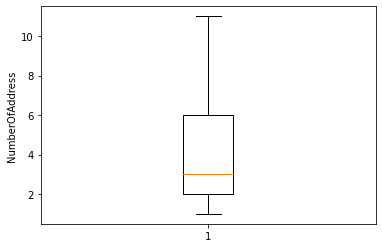

In [555]:
plt.boxplot(df['NumberOfAddress'])
plt.ylabel("NumberOfAddress")
plt.show()

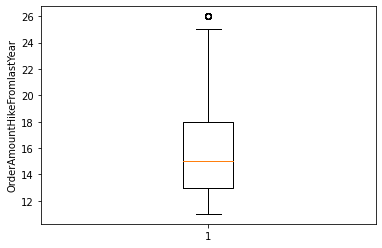

In [556]:
plt.boxplot(df['OrderAmountHikeFromlastYear'])
plt.ylabel("OrderAmountHikeFromlastYear")
plt.show()

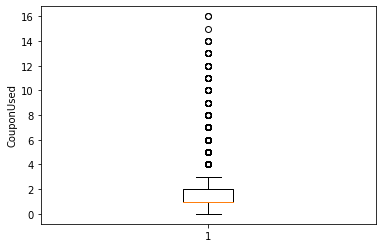

In [557]:
plt.boxplot(df['CouponUsed'])
plt.ylabel("CouponUsed")
plt.show()

- **In CouponUsed column 16 is max coupons**
- **used almost 75% of customers  used 2 thats why it is showing as ouliers**

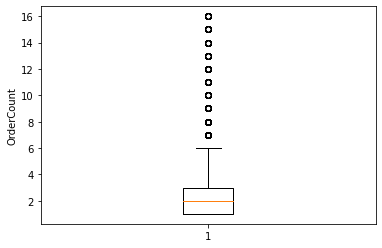

In [558]:
plt.boxplot(df['OrderCount'])
plt.ylabel("OrderCount")
plt.show()

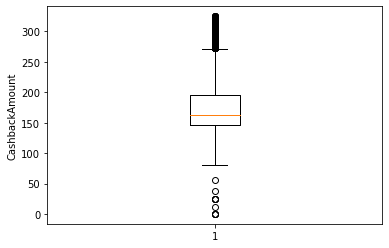

In [559]:
plt.boxplot(df['CashbackAmount'])
plt.ylabel("CashbackAmount")
plt.show()

In [560]:
df['CashbackAmount'].max()

325

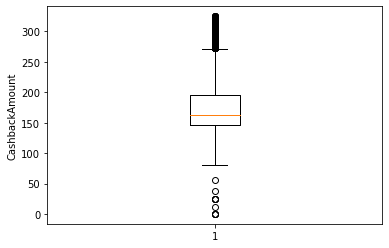

In [561]:
plt.boxplot(df['CashbackAmount'])
plt.ylabel("CashbackAmount")
plt.show()

In [562]:
num_col.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'HourSpendOnApp', 'NumberOfDeviceRegistered', 'SatisfactionScore',
       'NumberOfAddress', 'Complain', 'OrderAmountHikeFromlastYear',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

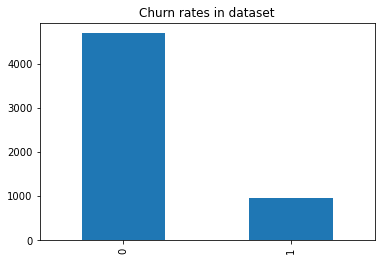

In [563]:
df['Churn'].value_counts().plot(kind='bar')
plt.title('Churn rates in dataset')
plt.show()

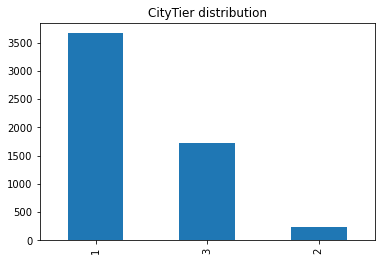

In [564]:
df['CityTier'].value_counts().plot(kind='bar')
plt.title('CityTier distribution')
plt.show()

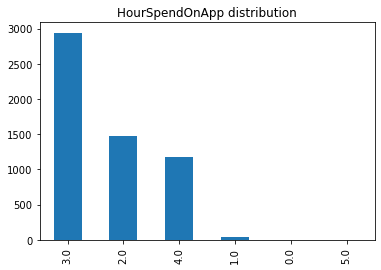

In [565]:
df['HourSpendOnApp'].value_counts().plot(kind='bar')
plt.title('HourSpendOnApp distribution')
plt.show()

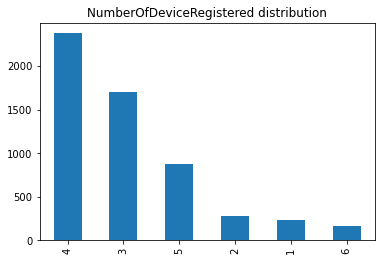

In [566]:
df['NumberOfDeviceRegistered'].value_counts().plot(kind='bar')
plt.title('NumberOfDeviceRegistered distribution')
plt.show()

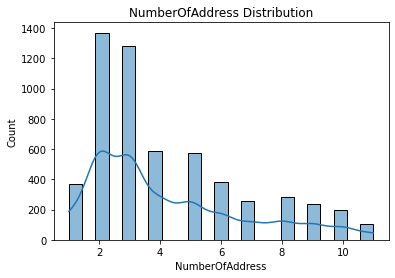

In [567]:

sns.histplot(data =df['NumberOfAddress'], kde = True)
plt.title("NumberOfAddress Distribution")
plt.show()

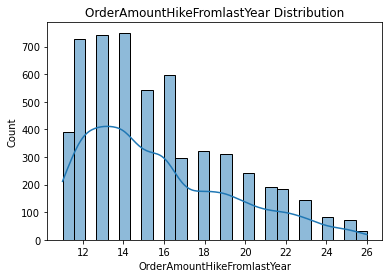

In [568]:

sns.histplot(data =num_col['OrderAmountHikeFromlastYear'], kde = True)
plt.title("OrderAmountHikeFromlastYear Distribution")
plt.show()

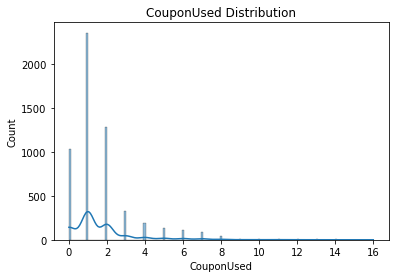

In [569]:
sns.histplot(data =num_col['CouponUsed'], kde = True)
plt.title("CouponUsed Distribution")
plt.show()

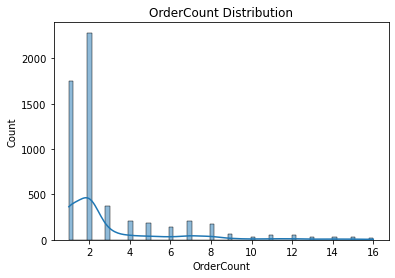

In [570]:
sns.histplot(data =num_col['OrderCount'], kde = True)
plt.title("OrderCount Distribution")
plt.show()

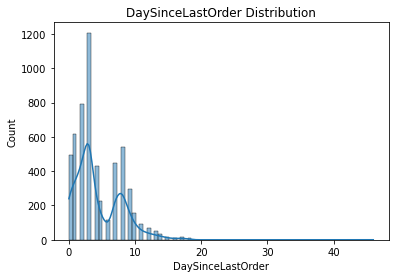

In [571]:
sns.histplot(data =num_col['DaySinceLastOrder'], kde = True)
plt.title("DaySinceLastOrder Distribution")
plt.show()

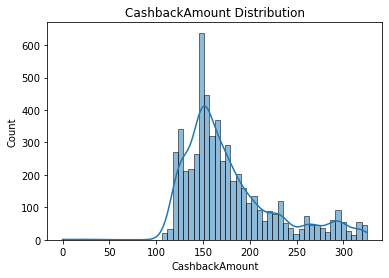

In [572]:
sns.histplot(data =num_col['CashbackAmount'], kde = True)
plt.title("CashbackAmount Distribution")
plt.show()

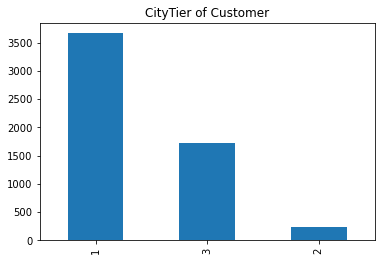

In [573]:
df['CityTier'].value_counts().plot(kind='bar')
plt.title('CityTier of Customer')
plt.show()

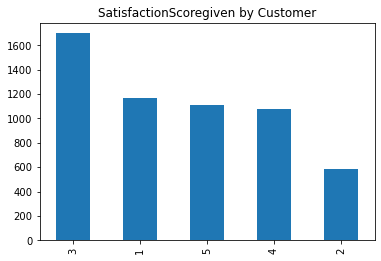

In [574]:
df['SatisfactionScore'].value_counts().plot(kind='bar')
plt.title('SatisfactionScoregiven by Customer')
plt.show()

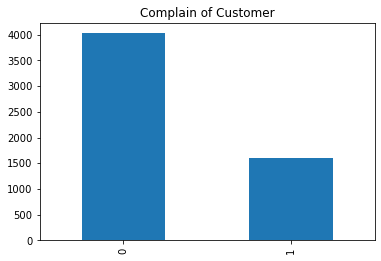

In [575]:
df['Complain'].value_counts().plot(kind='bar')
plt.title('Complain of Customer')
plt.show()

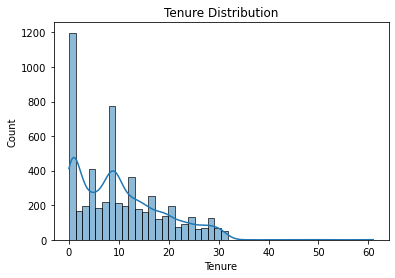

In [576]:
sns.histplot(data =num_col['Tenure'], kde = True)
plt.title("Tenure Distribution")
plt.show()

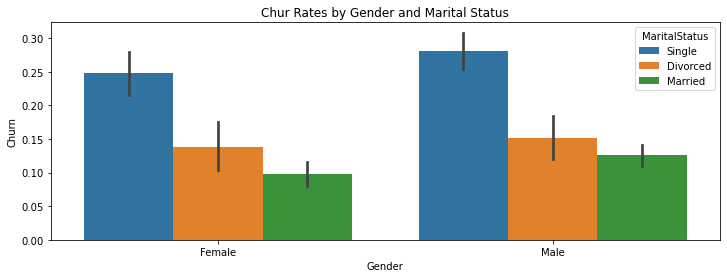

In [577]:
##Now we chwck all the columns indivisually we check relation between them

plt.figure(figsize=(12,4))
sns.barplot(x=df.Gender,y=df.Churn,hue=df.MaritalStatus)
plt.xticks(rotation=False)
plt.title('Chur Rates by Gender and Marital Status')
plt.show()


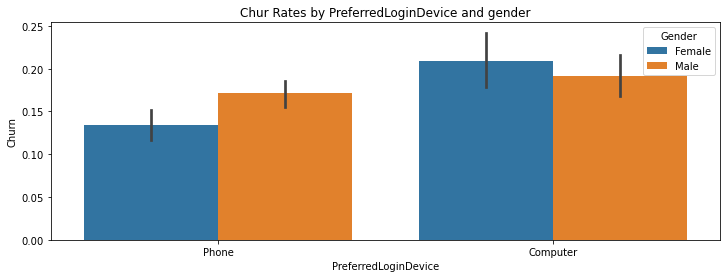

In [578]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferredLoginDevice,y=df.Churn,hue=df.Gender)
plt.xticks(rotation=False)
plt.title('Chur Rates by PreferredLoginDevice and gender')
plt.show()


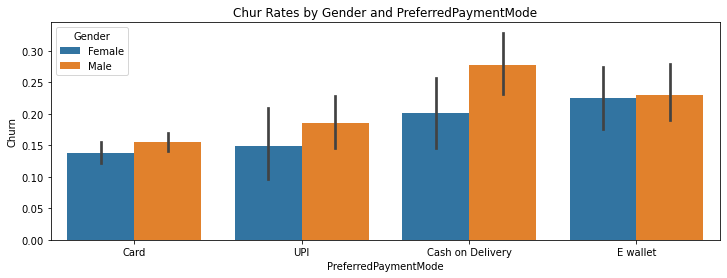

In [579]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferredPaymentMode,y=df.Churn,hue=df.Gender)
plt.xticks(rotation=False)
plt.title('Chur Rates by Gender and PreferredPaymentMode')
plt.show()


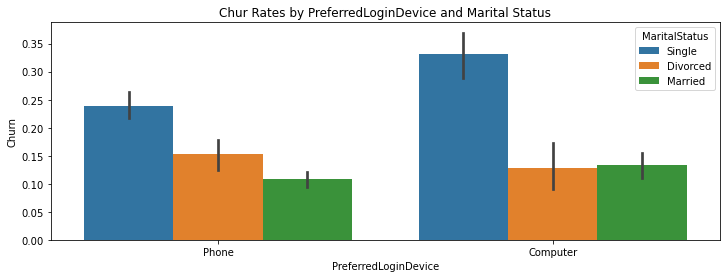

In [580]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferredLoginDevice,y=df.Churn,hue=df.MaritalStatus)
plt.xticks(rotation=False)
plt.title('Chur Rates by PreferredLoginDevice and Marital Status')
plt.show()

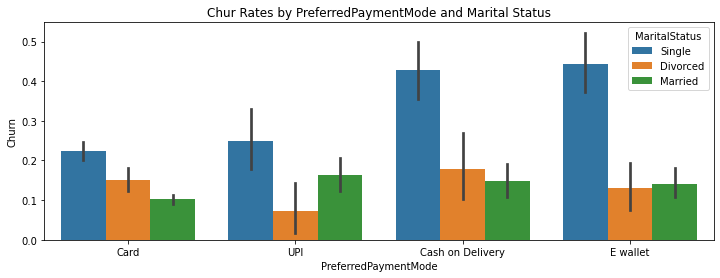

In [581]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferredPaymentMode,y=df.Churn,hue=df.MaritalStatus)
plt.xticks(rotation=False)
plt.title('Chur Rates by PreferredPaymentMode and Marital Status')
plt.show()

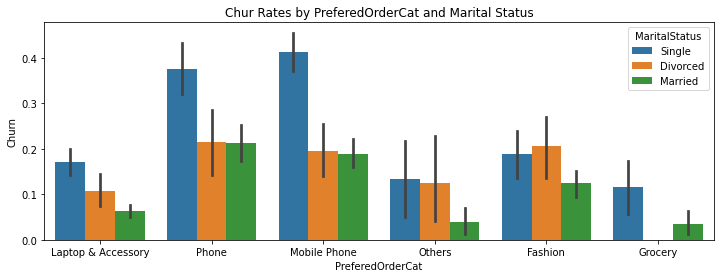

In [582]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferedOrderCat,y=df.Churn,hue=df.MaritalStatus)
plt.xticks(rotation=False)
plt.title('Chur Rates by PreferedOrderCat and Marital Status')
plt.show()

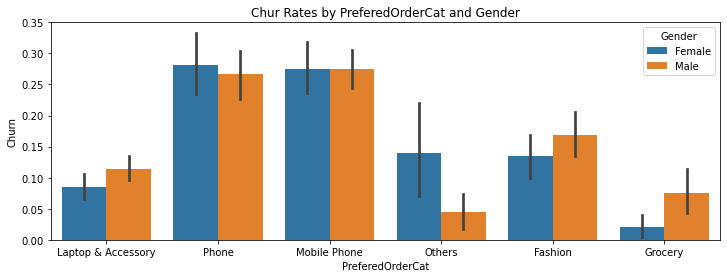

In [583]:
plt.figure(figsize=(12,4))
sns.barplot(x=df.PreferedOrderCat,y=df.Churn,hue=df.Gender)
plt.xticks(rotation=False)
plt.title('Chur Rates by PreferedOrderCat and Gender')
plt.show()

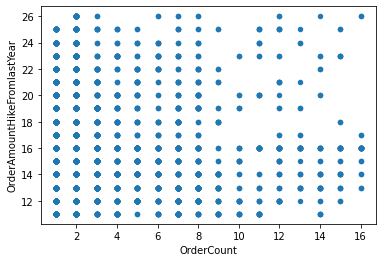

In [584]:
# lets now draw a scatter plot between OrderAmountHikeFromlastYear  and OrderCount for the 8th month
df[['OrderAmountHikeFromlastYear', 'OrderCount']].plot.scatter(x = 'OrderCount',
                                                              y='OrderAmountHikeFromlastYear')
plt.show()

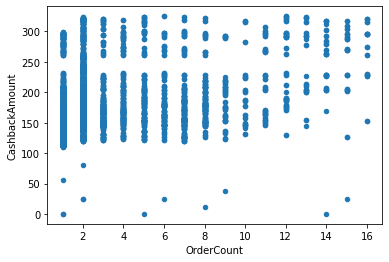

In [585]:
# lets now draw a scatter plot between OrderAmountHikeFromlastYear  and OrderCount for the 8th month
df[['CashbackAmount', 'OrderCount']].plot.scatter(x = 'OrderCount',
                                                              y='CashbackAmount')
plt.show()

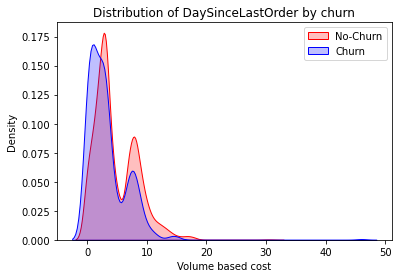

In [586]:
# Plot between churn vs CashbackAmount
ax = sns.kdeplot(df.DaySinceLastOrder[(df["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.DaySinceLastOrder[(df["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of DaySinceLastOrder by churn')
plt.show()

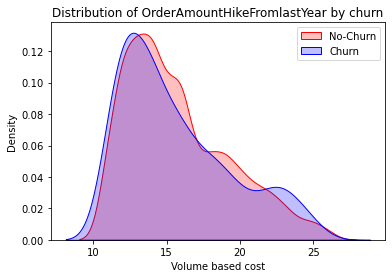

In [587]:
# Plot between churn vs OrderAmountHikeFromlastYear
ax = sns.kdeplot(df.OrderAmountHikeFromlastYear[(df["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.OrderAmountHikeFromlastYear[(df["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of OrderAmountHikeFromlastYear by churn')
plt.show()

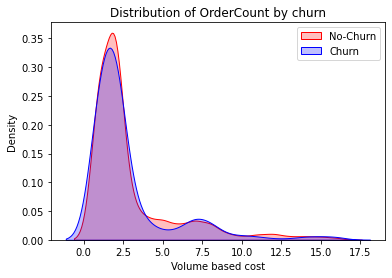

In [588]:
# Plot between churn vs OrderCount
ax = sns.kdeplot(df.OrderCount[(df["Churn"] == 0)],
                color="Red", shade = True)
ax = sns.kdeplot(df.OrderCount[(df["Churn"] == 1)],
                ax =ax, color="Blue", shade= True)
ax.legend(["No-Churn","Churn"],loc='upper right')
ax.set_ylabel('Density')
ax.set_xlabel('Volume based cost')
ax.set_title('Distribution of OrderCount by churn')
plt.show()

In [589]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'PreferredLoginDevice', 'CityTier',
       'WarehouseToHome', 'PreferredPaymentMode', 'Gender', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'PreferedOrderCat', 'SatisfactionScore',
       'MaritalStatus', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [590]:
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                Phone         3              6.0   
1       50002      1     9.0                Phone         1              8.0   
2       50003      1     9.0                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  \
0                 Card  Female             3.0                         3   
1                  UPI    Male             3.0                         4   
2                 Card    Male             2.0                         4   
3                 Card    Male             2.0                         4   
4                 Card    Male             3.0                         3   

     PreferedOrderCat  SatisfactionScore MaritalStatus  NumberOfAddress  \
0  Laptop & Accessory                  2        Single                9   
1               Phone                  3        Single                7   
2               Phone                  3        Single                6   
3  Laptop & Accessory                  5        Single                8   
4               Phone                  5        Single                3   

   Complain  OrderAmountHikeFromlastYear  CouponUsed  OrderCount  \
0         1                         11.0         1.0         1.0   
1         1                         15.0         0.0         1.0   
2         1                         14.0         0.0         1.0   
3         0                         23.0         0.0         1.0   
4         0                         11.0         1.0         1.0   

   DaySinceLastOrder  CashbackAmount  
0                5.0             160  
1                0.0             121  
2                3.0             120  
3                3.0             134  
4                3.0             130

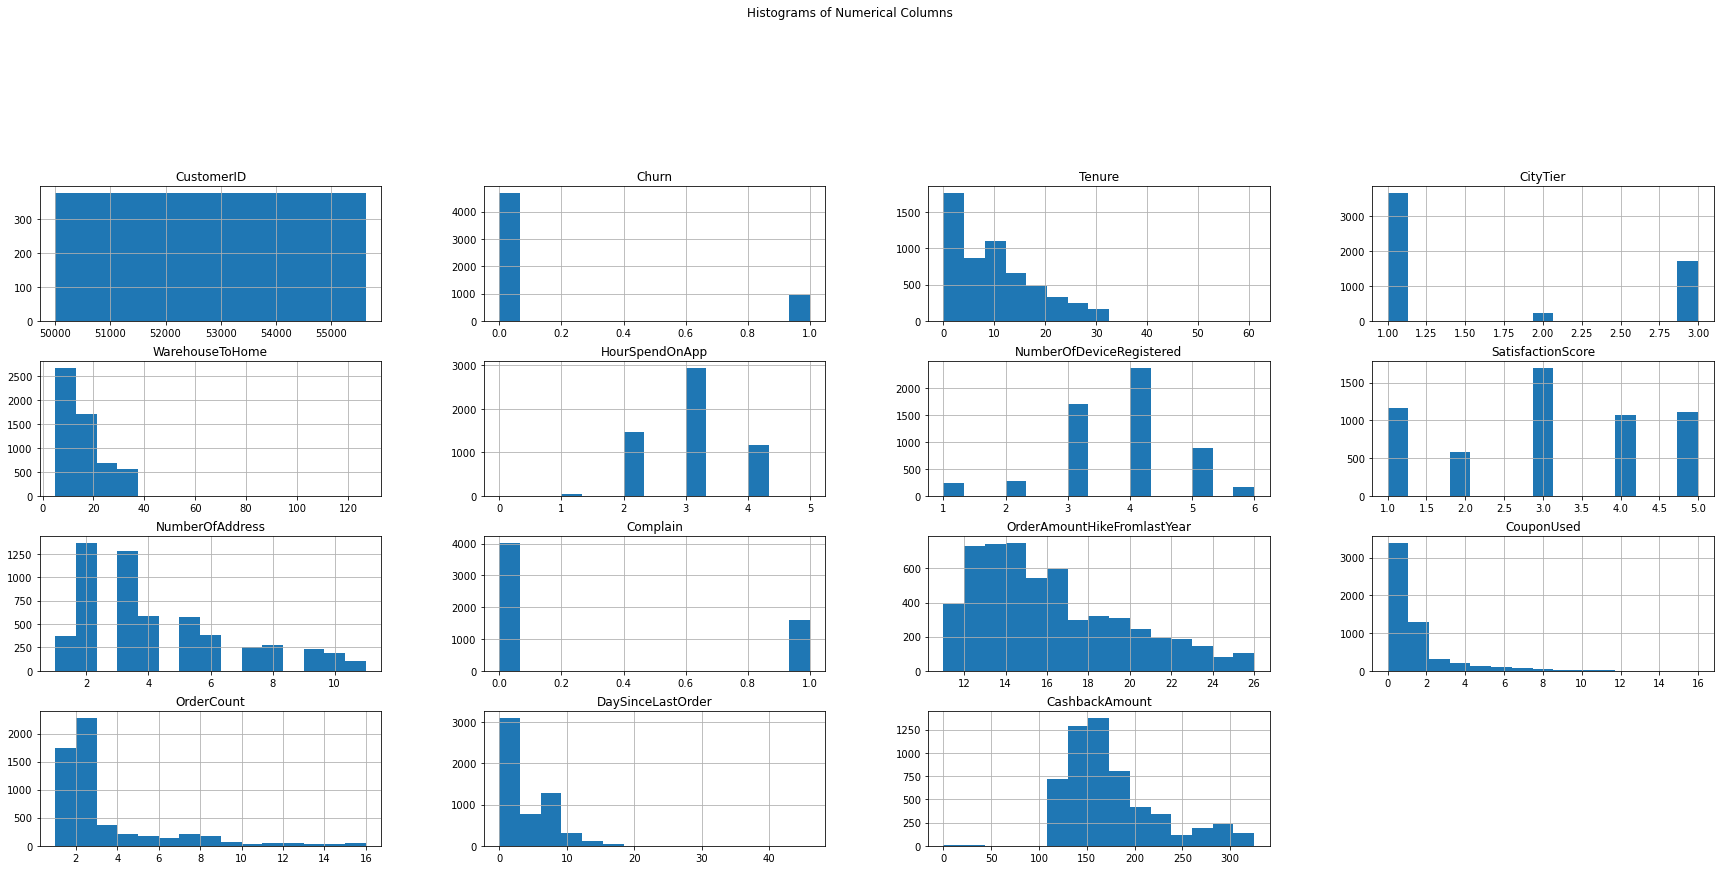

In [591]:
df[num_cols].hist(bins=15, figsize=(30, 25), layout=(8, 4))
plt.xlabel('Value')
plt.suptitle('Histograms of Numerical Columns')
plt.show()

In [592]:
num_col=num_cols.drop('CustomerID')

In [593]:
df[num_col].corr()

Churn    Tenure  CityTier  WarehouseToHome  \
Churn                        1.000000 -0.337831  0.084703         0.069544   
Tenure                      -0.337831  1.000000 -0.057895        -0.012191   
CityTier                     0.084703 -0.057895  1.000000         0.013576   
WarehouseToHome              0.069544 -0.012191  0.013576         1.000000   
HourSpendOnApp               0.018816 -0.017282 -0.009921         0.064069   
NumberOfDeviceRegistered     0.107939 -0.020657  0.027934         0.023020   
SatisfactionScore            0.105481 -0.014452 -0.011554         0.007524   
NumberOfAddress              0.042485  0.238227 -0.027901        -0.007682   
Complain                     0.250188 -0.020535  0.003375         0.026825   
OrderAmountHikeFromlastYear -0.011131  0.010698 -0.031588         0.035965   
CouponUsed                  -0.001430  0.101535  0.022629         0.002675   
OrderCount                  -0.024038  0.165339  0.033551         0.000354   
DaySinceLastOrder           -0.155871  0.174378  0.010214         0.020253   
CashbackAmount              -0.154161  0.468178  0.055698         0.000090   

                             HourSpendOnApp  NumberOfDeviceRegistered  \
Churn                              0.018816                  0.107939   
Tenure                            -0.017282                 -0.020657   
CityTier                          -0.009921                  0.027934   
WarehouseToHome                    0.064069                  0.023020   
HourSpendOnApp                     1.000000                  0.305048   
NumberOfDeviceRegistered           0.305048                  1.000000   
SatisfactionScore                  0.030937                 -0.017228   
NumberOfAddress                    0.140668                  0.086432   
Complain                           0.006607                  0.003407   
OrderAmountHikeFromlastYear        0.102347                  0.069118   
CouponUsed                         0.187166                  0.152065   
OrderCount                         0.102053                  0.099790   
DaySinceLastOrder                  0.061213                  0.007350   
CashbackAmount                     0.114268                  0.137396   

                             SatisfactionScore  NumberOfAddress  Complain  \
Churn                                 0.105481         0.042485  0.250188   
Tenure                               -0.014452         0.238227 -0.020535   
CityTier                             -0.011554        -0.027901  0.003375   
WarehouseToHome                       0.007524        -0.007682  0.026825   
HourSpendOnApp                        0.030937         0.140668  0.006607   
NumberOfDeviceRegistered             -0.017228         0.086432  0.003407   
SatisfactionScore                     1.000000         0.054149 -0.031115   
NumberOfAddress                       0.054149         1.000000 -0.027666   
Complain                             -0.031115        -0.027666  1.000000   
OrderAmountHikeFromlastYear          -0.027058         0.014055 -0.004667   
CouponUsed                            0.017423         0.037698 -0.007810   
OrderCount                            0.018166        -0.012819 -0.021288   
DaySinceLastOrder                     0.031985        -0.066298 -0.041415   
CashbackAmount                        0.003429         0.189904  0.000598   

                             OrderAmountHikeFromlastYear  CouponUsed  \
Churn                                          -0.011131   -0.001430   
Tenure                                          0.010698    0.101535   
CityTier                                       -0.031588    0.022629   
WarehouseToHome                                 0.035965    0.002675   
HourSpendOnApp                                  0.102347    0.187166   
NumberOfDeviceRegistered                        0.069118    0.152065   
SatisfactionScore                              -0.027058    0.017423   
NumberOfAddress                  

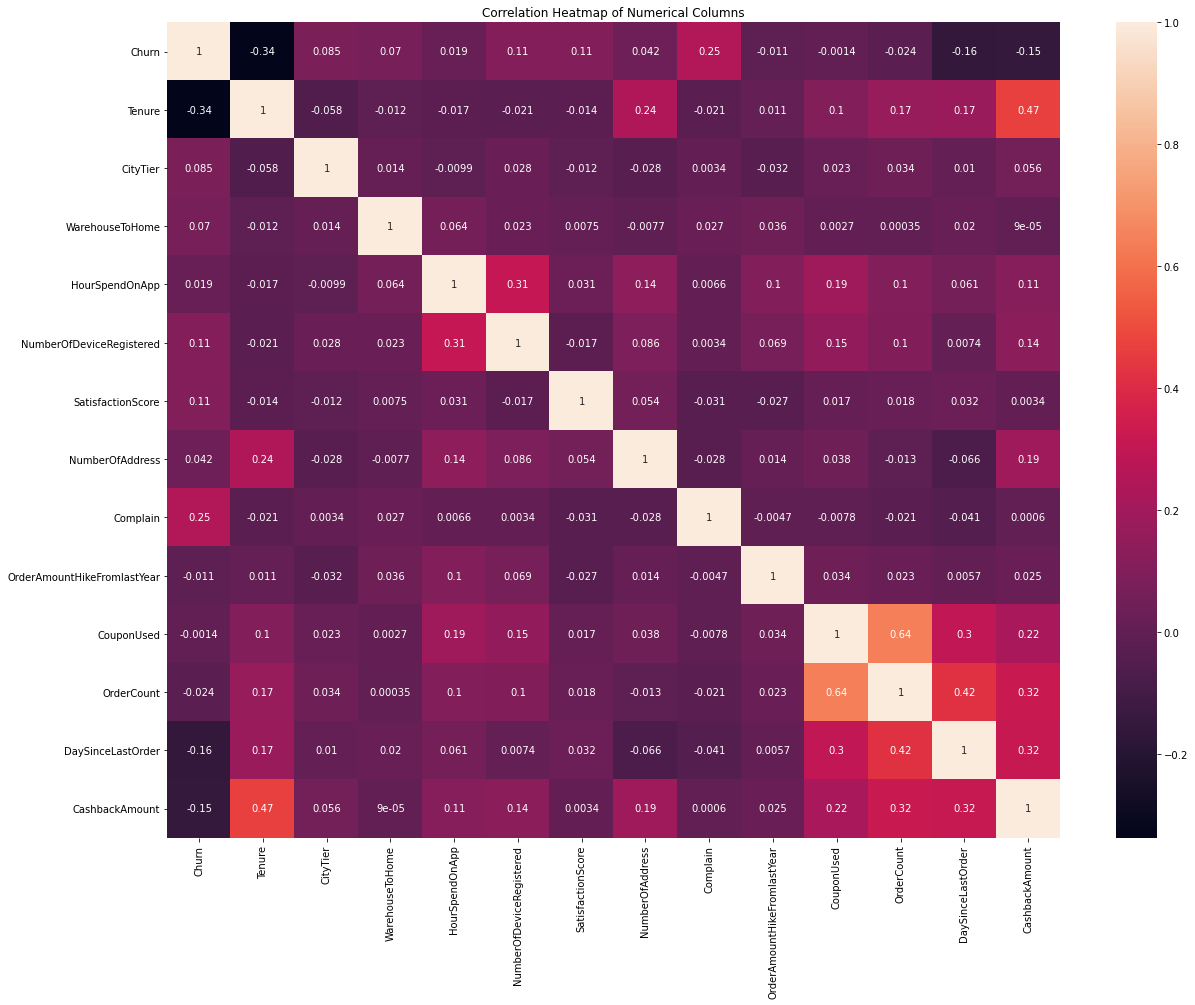

In [594]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(df[num_col].corr(),annot = True)
plt.show()

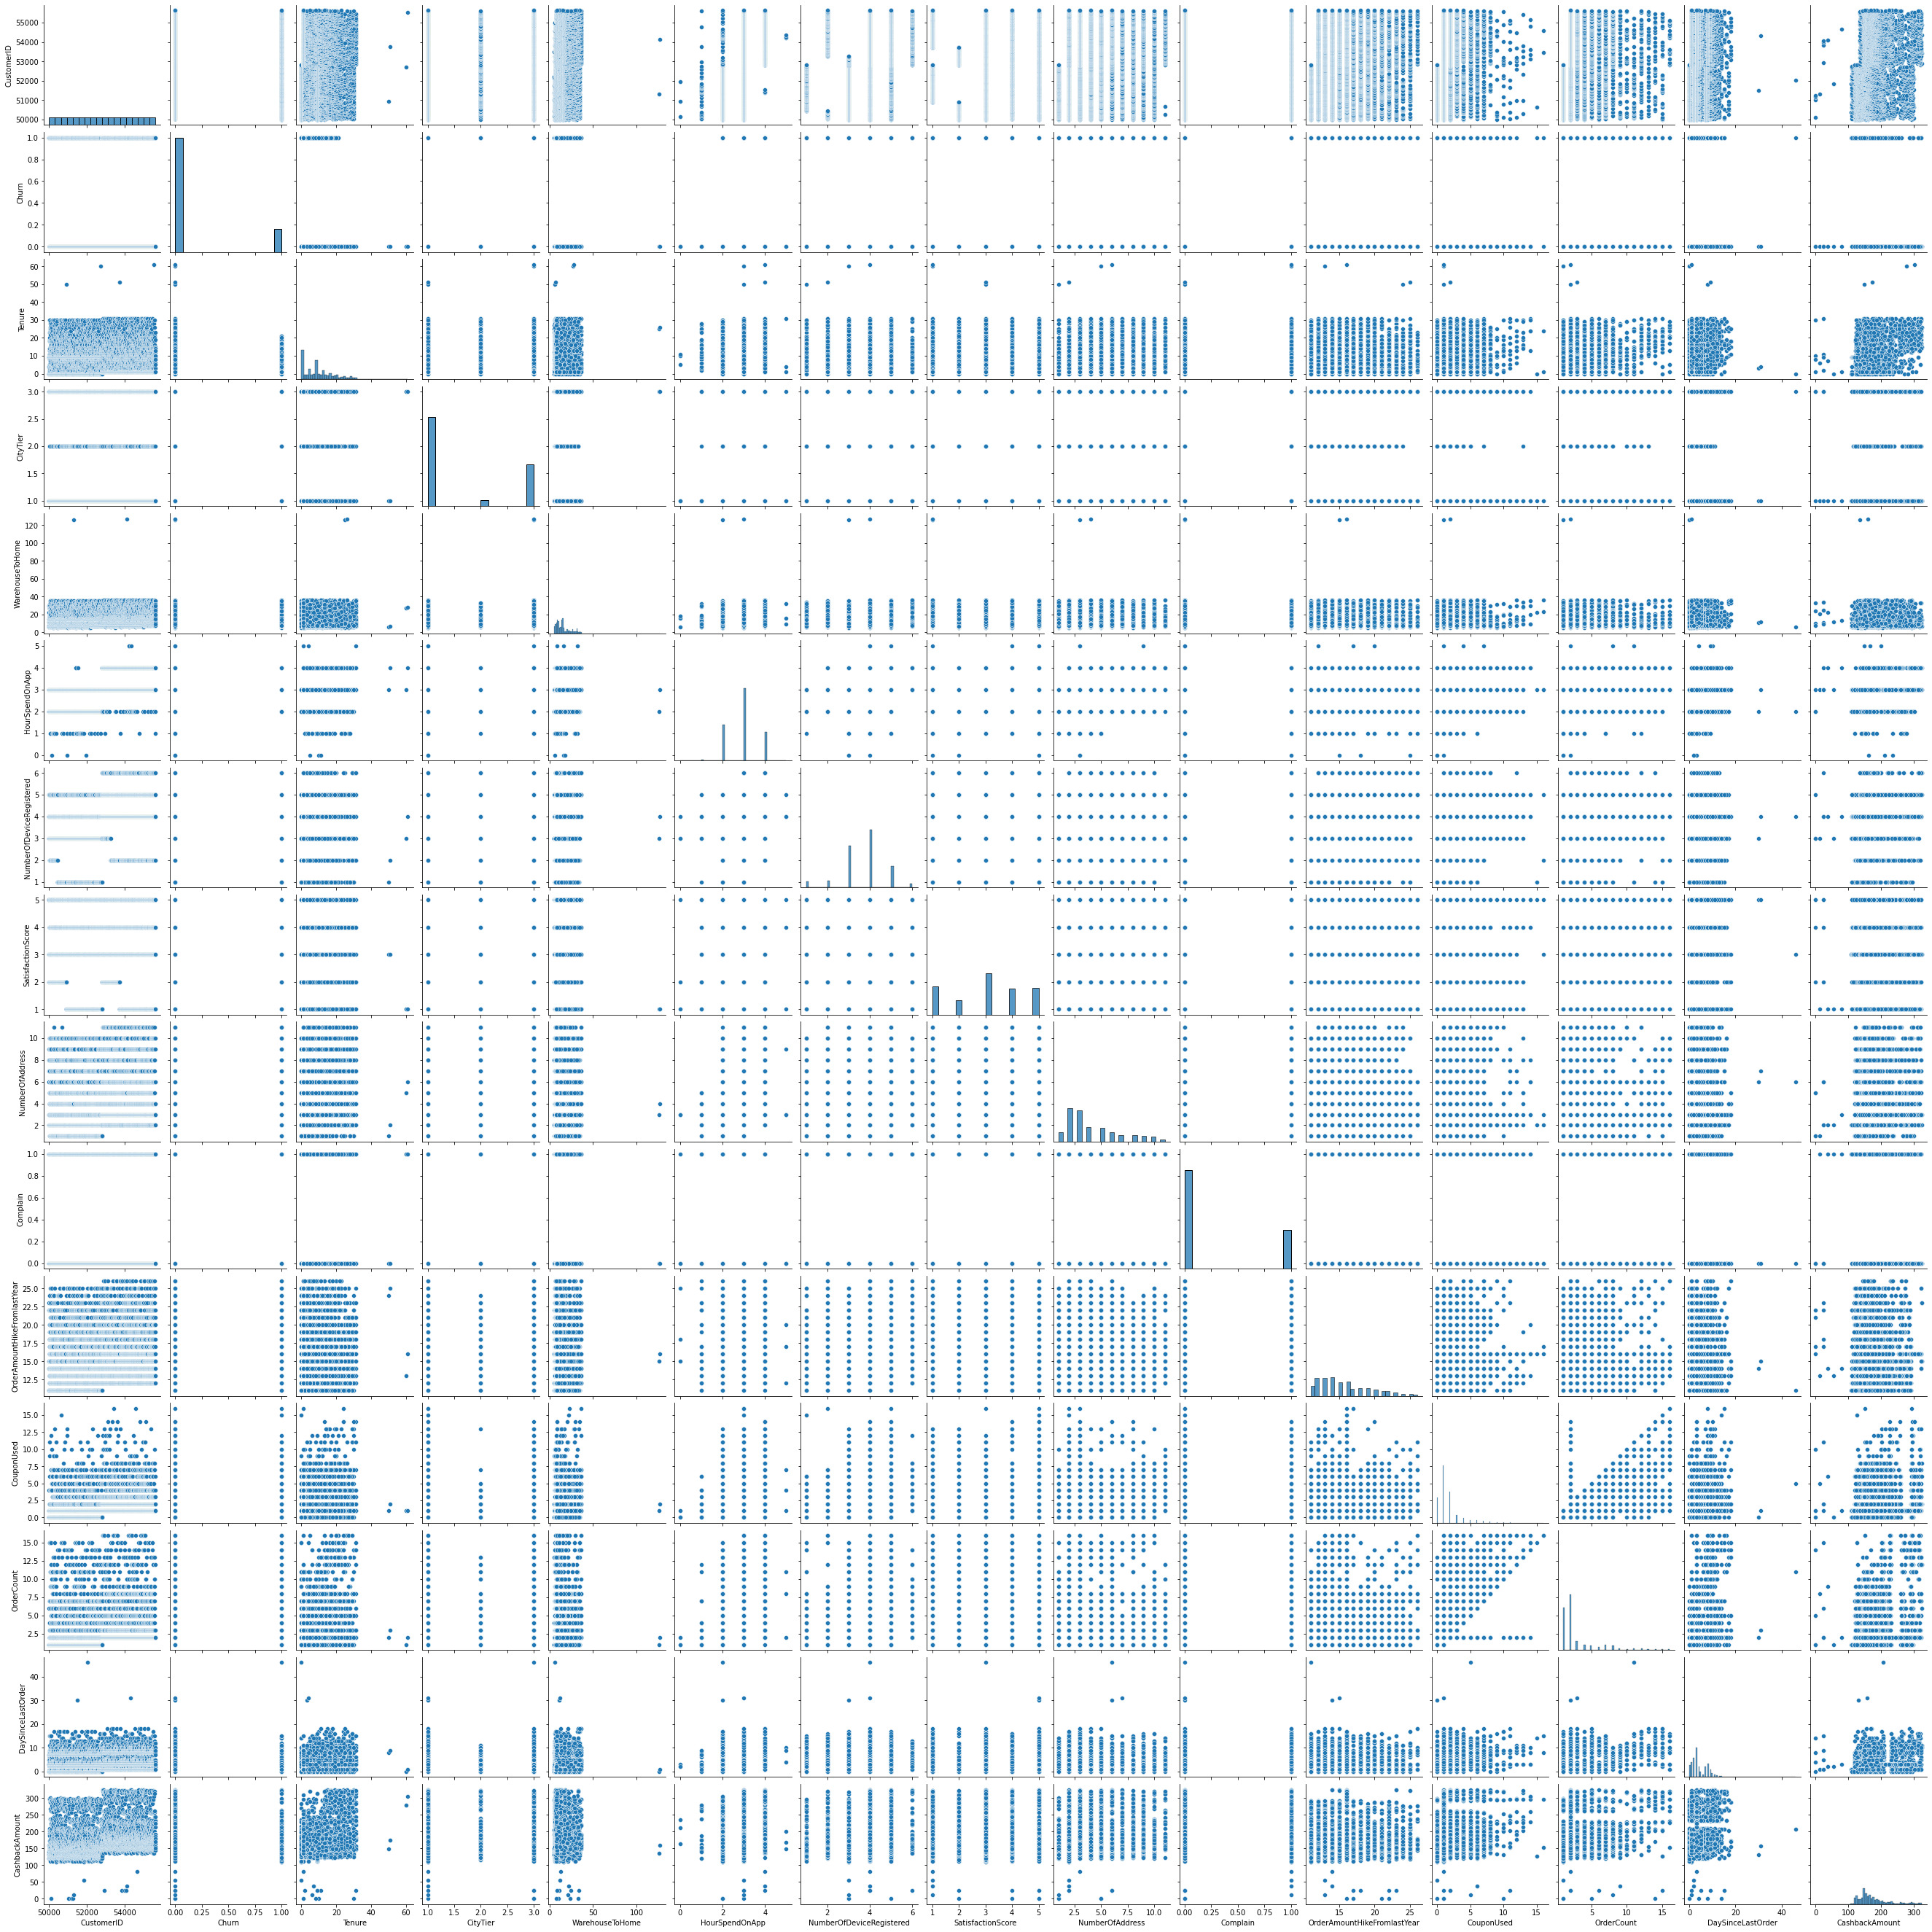

In [595]:
sns.pairplot(df)
plt.show()

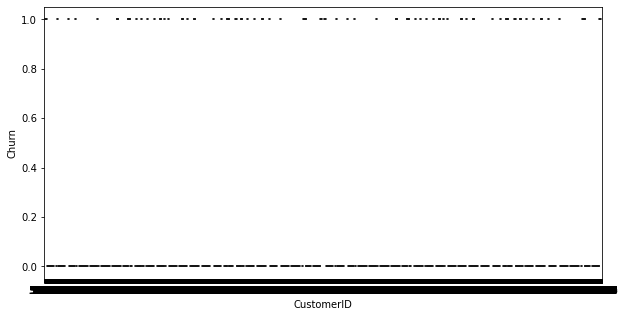

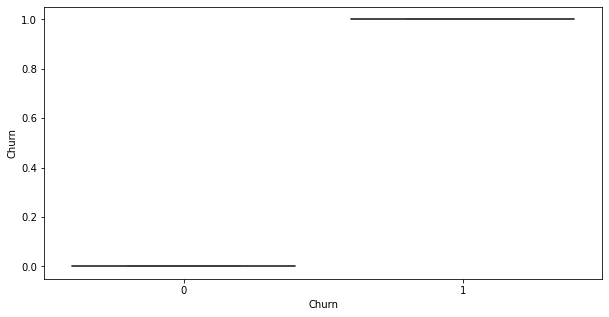

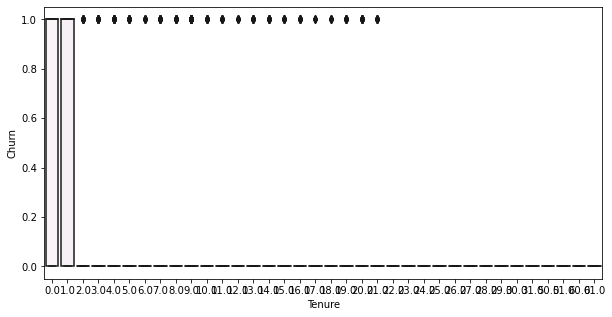

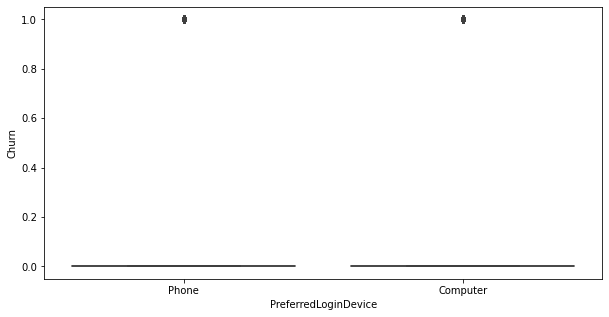

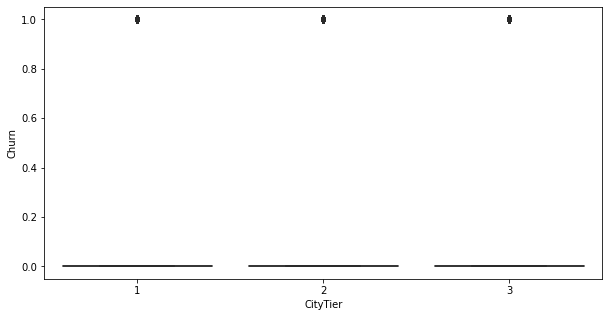

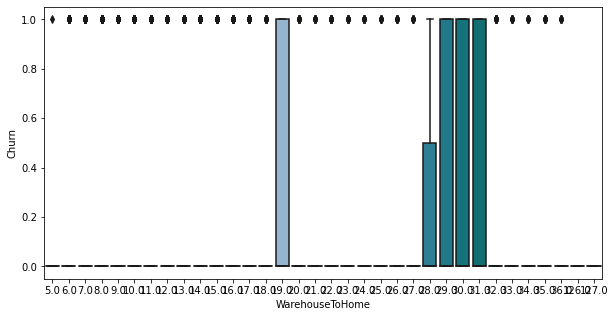

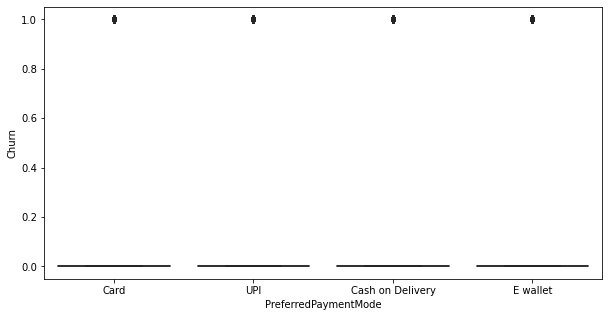

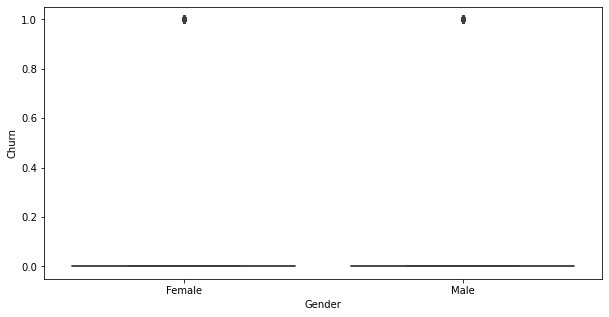

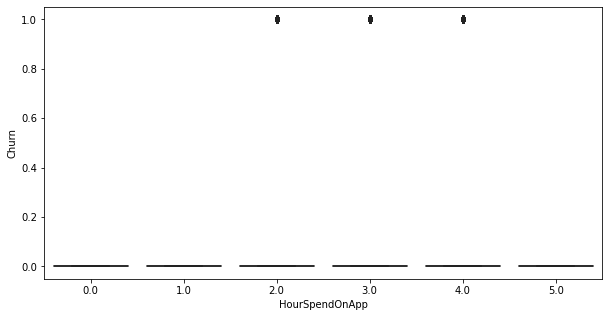

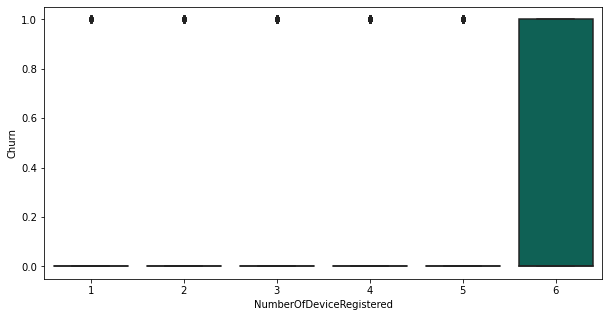

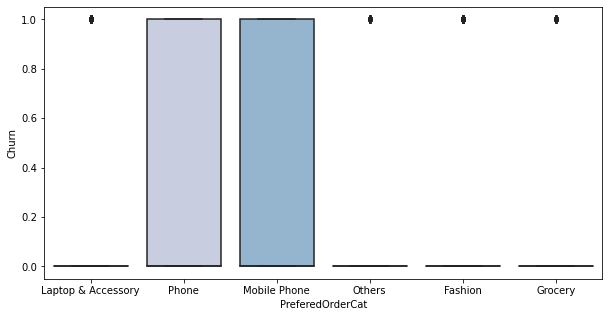

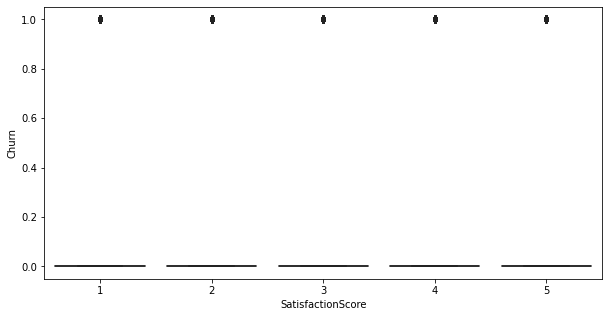

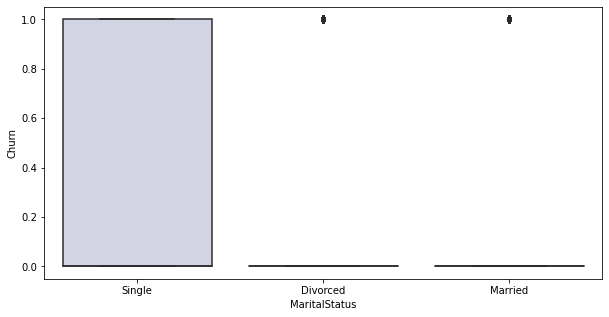

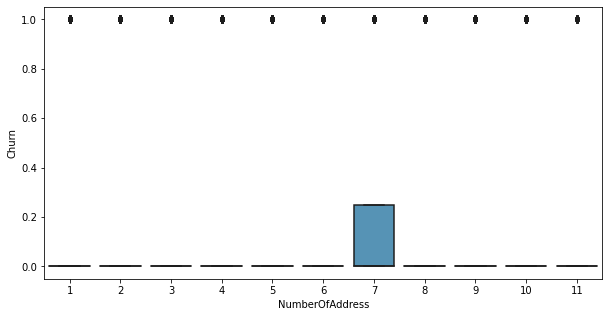

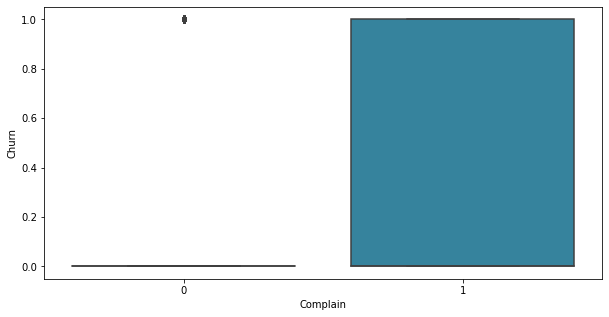

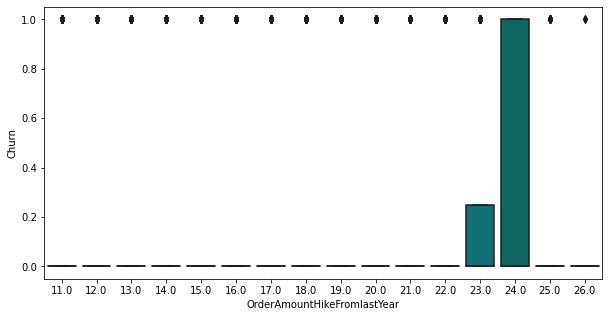

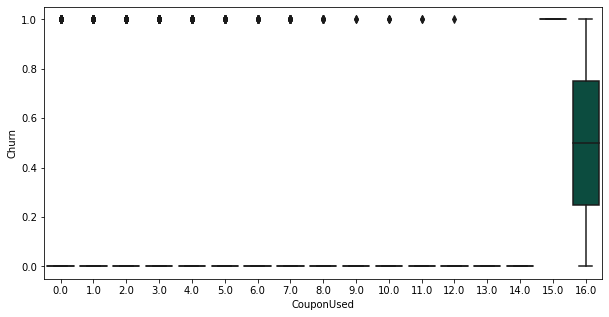

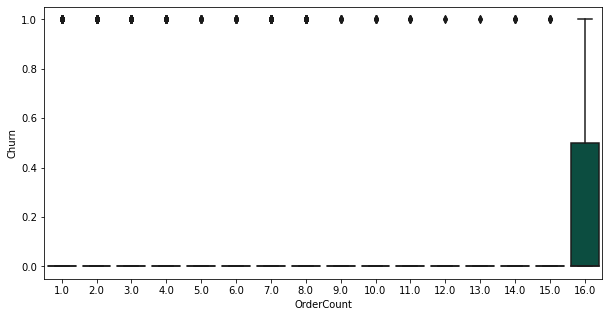

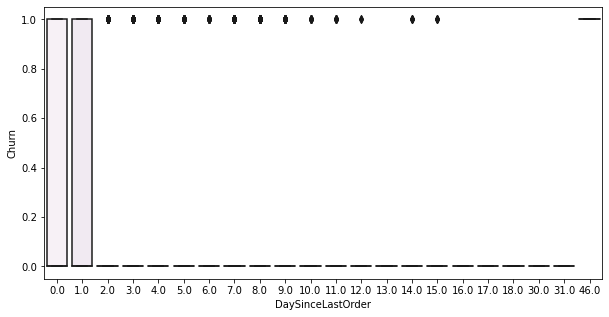

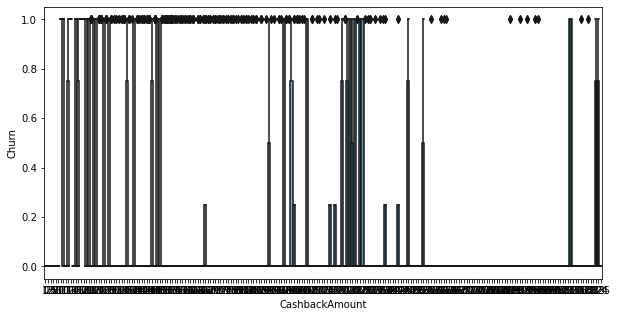

In [596]:
for feature in df.columns:
    plt.figure(figsize=(10,5))

    sns.boxplot(x=df[feature], y=df["Churn"], palette=("PuBuGn"))

Text(0.5, 1.0, 'Features Correlating with Churn variable')

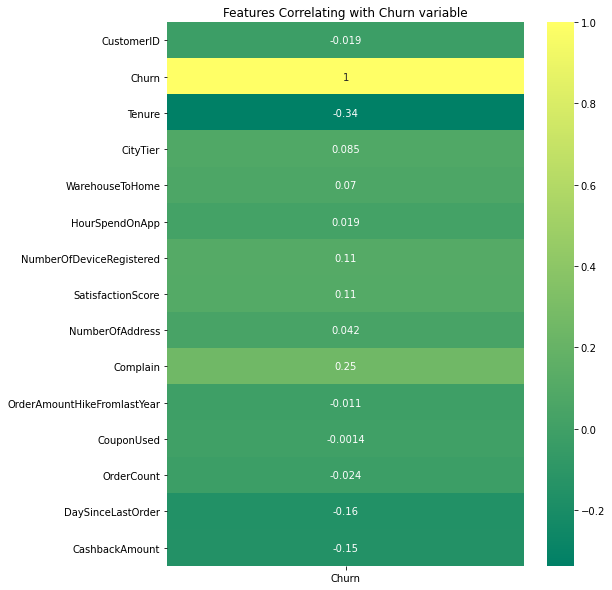

In [597]:
# Checking Correlation between target variable(Churn) with the other variable in the dataset
plt.figure(figsize=(8,10))
heatmap_churn = sns.heatmap(df.corr()[['Churn']],annot=True, 
                                cmap='summer')
heatmap_churn.set_title("Features Correlating with Churn variable")

## Data Preprocessing 

In [598]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy = pd.get_dummies(df[['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus']])
dummy.head()

PreferredLoginDevice_Computer  PreferredLoginDevice_Phone  \
0                              0                           1   
1                              0                           1   
2                              0                           1   
3                              0                           1   
4                              0                           1   

   PreferredPaymentMode_Card  PreferredPaymentMode_Cash on Delivery  \
0                          1                                      0   
1                          0                                      0   
2                          1                                      0   
3                          1                                      0   
4                          1                                      0   

   PreferredPaymentMode_E wallet  PreferredPaymentMode_UPI  \
0                              0                         0   
1                              0                         1   
2                              0                         0   
3                              0                         0   
4                              0                         0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              0   
2                                    0                              0   
3                                    1                              0   
4                                    0                              0   

   PreferedOrderCat_Others  PreferedOrderCat_Phone  MaritalStatus_Divorced  \
0                        0                       0                       0   
1                        0                       1                       0   
2                        0                       1                       0   
3                        0                       0                       0   
4                        0                       1                       0   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1

In [599]:
dummy.drop(['MaritalStatus_Divorced','PreferedOrderCat_Others','PreferredLoginDevice_Computer','PreferredPaymentMode_UPI'],axis=1, inplace=True)

In [600]:
dummy.head()

PreferredLoginDevice_Phone  PreferredPaymentMode_Card  \
0                           1                          1   
1                           1                          0   
2                           1                          1   
3                           1                          1   
4                           1                          1   

   PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_E wallet  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              0   
2                                    0                              0   
3                                    1                              0   
4                                    0                              0   

   PreferedOrderCat_Phone  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       1                      0                     1  
2                       1                      0                     1  
3                       0                      0                     1  
4                       1                      0                     1

In [601]:
# Adding the results to the master dataframe
df = pd.concat([df, dummy], axis=1)
df.head()

CustomerID  Churn  Tenure PreferredLoginDevice  CityTier  WarehouseToHome  \
0       50001      1     4.0                Phone         3              6.0   
1       50002      1     9.0                Phone         1              8.0   
2       50003      1     9.0                Phone         1             30.0   
3       50004      1     0.0                Phone         3             15.0   
4       50005      1     0.0                Phone         1             12.0   

  PreferredPaymentMode  Gender  HourSpendOnApp  NumberOfDeviceRegistered  ...  \
0                 Card  Female             3.0                         3  ...   
1                  UPI    Male             3.0                         4  ...   
2                 Card    Male             2.0                         4  ...   
3                 Card    Male             2.0                         4  ...   
4                 Card    Male             3.0                         3  ...   

  PreferredPaymentMode_Card  PreferredPaymentMode_Cash on Delivery  \
0                         1                                      0   
1                         0                                      0   
2                         1                                      0   
3                         1                                      0   
4                         1                                      0   

  PreferredPaymentMode_E wallet  PreferedOrderCat_Fashion  \
0                             0                         0   
1                             0                         0   
2                             0                         0   
3                             0                         0   
4                             0                         0   

   PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
0                         0                                    1   
1                         0                                    0   
2                         0                                    0   
3                         0                                    1   
4                         0                                    0   

   PreferedOrderCat_Mobile Phone  PreferedOrderCat_Phone  \
0                              0                       0   
1                              0                       1   
2                              0                       1   
3                              0                       0   
4                              0                       1   

   MaritalStatus_Married  MaritalStatus_Single  
0                      0                     1  
1                      0                     1  
2                      0                     1  
3                      0                     1  
4                      0                     1  

[5 rows x 31 columns]

In [602]:
df.drop(['PreferredLoginDevice','PreferredPaymentMode','PreferedOrderCat','MaritalStatus'],axis=1,inplace=True)

In [603]:
df.head()

CustomerID  Churn  Tenure  CityTier  WarehouseToHome  Gender  \
0       50001      1     4.0         3              6.0  Female   
1       50002      1     9.0         1              8.0    Male   
2       50003      1     9.0         1             30.0    Male   
3       50004      1     0.0         3             15.0    Male   
4       50005      1     0.0         1             12.0    Male   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0                         4                  3   
3             2.0                         4                  5   
4             3.0                         3                  5   

   NumberOfAddress  ...  PreferredPaymentMode_Card  \
0                9  ...                          1   
1                7  ...                          0   
2                6  ...                          1   
3                8  ...                          1   
4                3  ...                          1   

   PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_E wallet  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              0   
2                                    0                              0   
3                                    1                              0   
4                                    0                              0   

   PreferedOrderCat_Phone  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       1                      0                     1  
2                       1                      0                     1  
3                       0                      0                     1  
4                       1                      0                     1  

[5 rows x 27 columns]

In [604]:
#df['Gender'].replace([0,1],['Female','Male'],inplace=True)

In [605]:
#df['Gender'].replace({0:'Female',1:'Male'},inplace=True)

In [606]:
#df['Gender'].replace([0,1],['Female','Male'],inplace=True)

In [607]:
df['Gender'].loc[df['Gender']=='Female']=0
df['Gender'].loc[df['Gender']=='Male']=1

In [608]:
df.head()

CustomerID  Churn  Tenure  CityTier  WarehouseToHome Gender  \
0       50001      1     4.0         3              6.0      0   
1       50002      1     9.0         1              8.0      1   
2       50003      1     9.0         1             30.0      1   
3       50004      1     0.0         3             15.0      1   
4       50005      1     0.0         1             12.0      1   

   HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
0             3.0                         3                  2   
1             3.0                         4                  3   
2             2.0                         4                  3   
3             2.0                         4                  5   
4             3.0                         3                  5   

   NumberOfAddress  ...  PreferredPaymentMode_Card  \
0                9  ...                          1   
1                7  ...                          0   
2                6  ...                          1   
3                8  ...                          1   
4                3  ...                          1   

   PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_E wallet  \
0                                      0                              0   
1                                      0                              0   
2                                      0                              0   
3                                      0                              0   
4                                      0                              0   

   PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
0                         0                         0   
1                         0                         0   
2                         0                         0   
3                         0                         0   
4                         0                         0   

   PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
0                                    1                              0   
1                                    0                              0   
2                                    0                              0   
3                                    1                              0   
4                                    0                              0   

   PreferedOrderCat_Phone  MaritalStatus_Married  MaritalStatus_Single  
0                       0                      0                     1  
1                       1                      0                     1  
2                       1                      0                     1  
3                       0                      0                     1  
4                       1                      0                     1  

[5 rows x 27 columns]

0    83.161634
1    16.838366
Name: Churn, dtype: float64


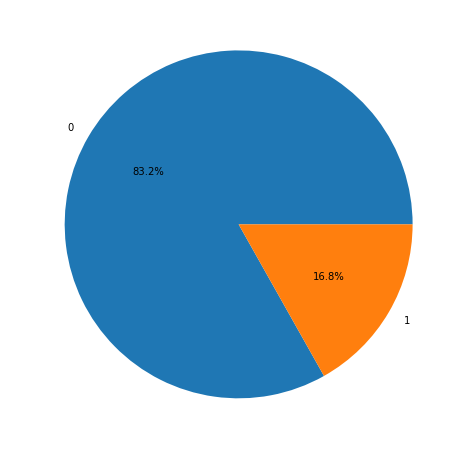

In [609]:
# lets find out churn/non churn percentage
print((df['Churn'].value_counts()/len(df))*100)

((df['Churn'].value_counts()/len(df))*100).plot(kind="pie",autopct='%1.1f%%',figsize=(8,8))
plt.ylabel(' ')
plt.show()

***As we can see that 83% of the customers do not churn, there is a class of imbalance***

In [610]:
num_c = df.columns[df.dtypes != 'object']

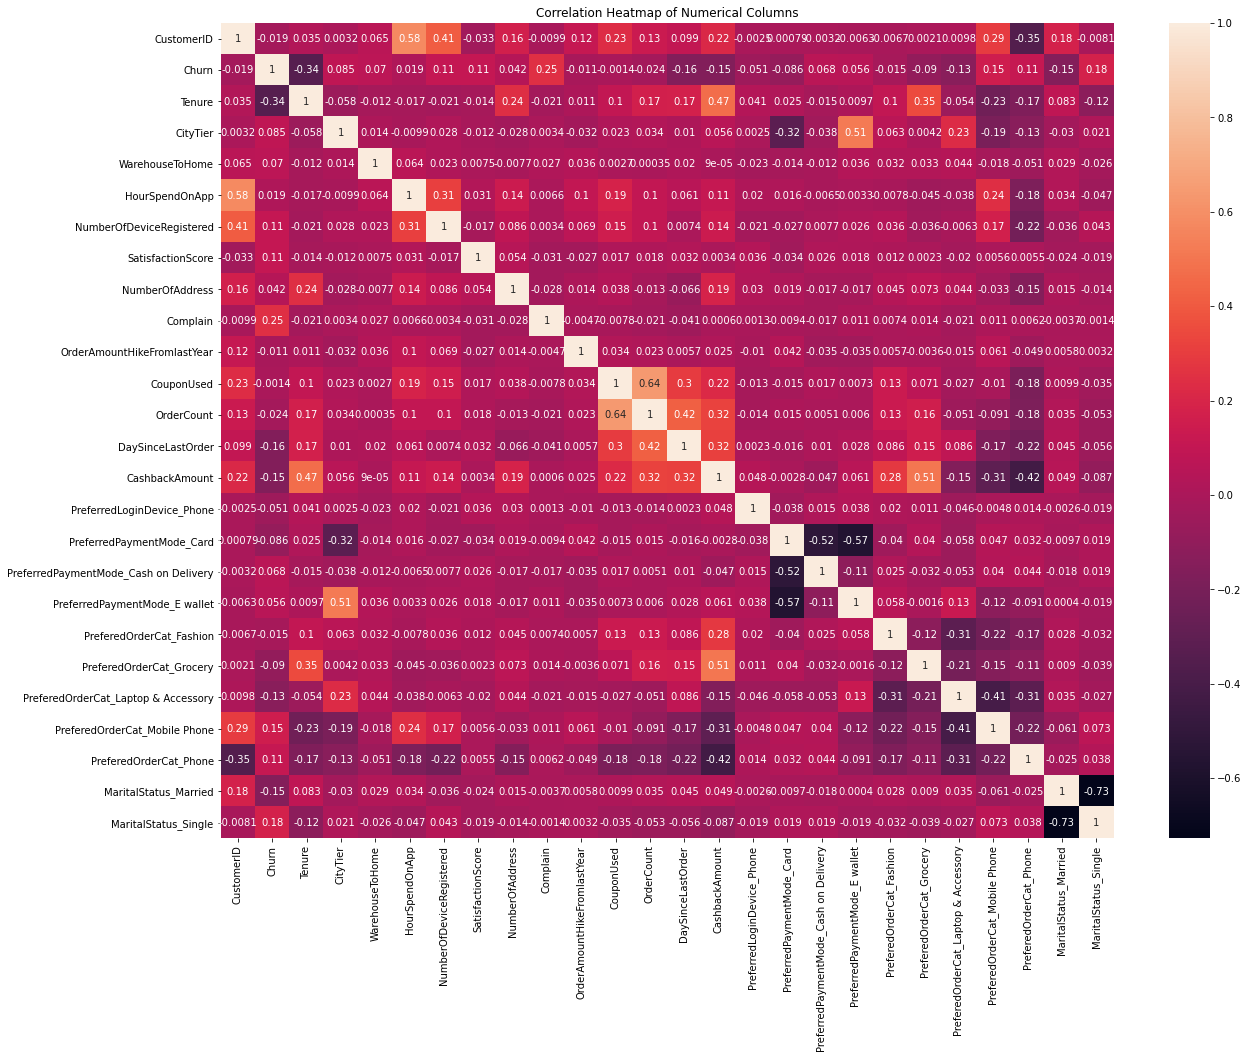

In [611]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(df.corr(),annot = True)
plt.show()

In [612]:
# dropping  columns with high corelation 
df.drop(['PreferredPaymentMode_Card','MaritalStatus_Single'],axis=1, inplace=True)

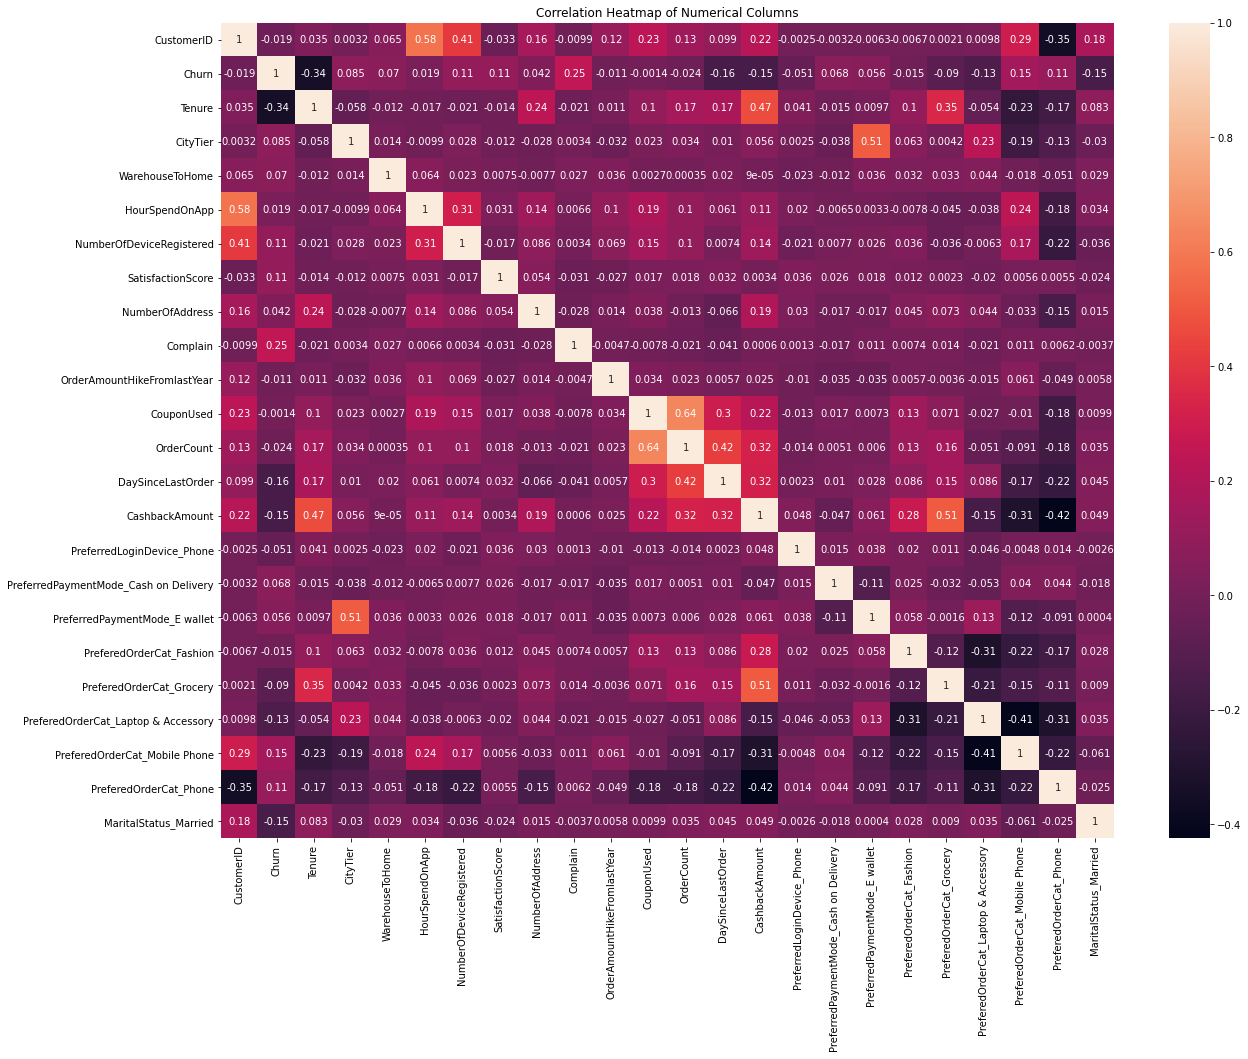

In [613]:
# Create a heatmap of the correlation matrix for numerical columns
plt.figure(figsize=(20, 15))
plt.title('Correlation Heatmap of Numerical Columns')
sns.heatmap(df.corr(),annot = True)
plt.show()

- **Data Looks fine now**
- **But dataset still imbalance**

### Feature Scaling

In [614]:
df.columns

Index(['CustomerID', 'Churn', 'Tenure', 'CityTier', 'WarehouseToHome',
       'Gender', 'HourSpendOnApp', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain',
       'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Phone',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_E wallet', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Phone',
       'MaritalStatus_Married'],
      dtype='object')

### Train Test Splitting

In [615]:
# lets create X dataset for model building.
X = df.drop(['Churn'],axis=1)

In [616]:

# lets create y dataset for model building.
y=df['Churn']
y.head()

0    1
1    1
2    1
3    1
4    1
Name: Churn, dtype: int64

In [617]:
# split the dateset into train and test datasets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7, random_state=1)
print("Dimension of X_train:", X_train.shape)
print("Dimension of X_test:", X_test.shape)

Dimension of X_train: (3940, 24)
Dimension of X_test: (1689, 24)


In [618]:
X_train.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3940 entries, 534 to 235
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   CustomerID                             3940 non-null   int64  
 1   Tenure                                 3940 non-null   float64
 2   CityTier                               3940 non-null   int64  
 3   WarehouseToHome                        3940 non-null   float64
 4   Gender                                 3940 non-null   object 
 5   HourSpendOnApp                         3940 non-null   float64
 6   NumberOfDeviceRegistered               3940 non-null   int64  
 7   SatisfactionScore                      3940 non-null   int64  
 8   NumberOfAddress                        3940 non-null   int64  
 9   Complain                               3940 non-null   int64  
 10  OrderAmountHikeFromlastYear            3940 non-null   float64
 11  Cou

## Feature Scaling


As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for area, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

- **Min-Max scaling**
- **Standardisation (mean-0, Std-1)**

This time, we will use MinMax scaling.

In [619]:
# apply scaling on the dataset
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler

scale =['WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','Tenure']

scaler = MinMaxScaler()
X_train[scale] = scaler.fit_transform(X_train[scale])
X_train.head()

CustomerID    Tenure  CityTier  WarehouseToHome Gender  HourSpendOnApp  \
534        50535  0.016393         3         0.193548      1             0.6   
821        50822  0.049180         3         0.838710      1             0.4   
1571       51572  0.163934         3         0.161290      1             0.6   
4351       54352  0.016393         1         0.354839      0             1.0   
4705       54706  0.065574         3         0.935484      1             0.8   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
534                        0.4                  2                2         0   
821                        0.6                  4                3         1   
1571                       0.4                  1                5         0   
4351                       0.6                  4                3         0   
4705                       0.6                  1                9         0   

      ...  CashbackAmount  PreferredLoginDevice_Phone  \
534   ...             149                           1   
821   ...             191                           1   
1571  ...             128                           0   
4351  ...             148                           1   
4705  ...             178                           1   

      PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_E wallet  \
534                                       0                              0   
821                                       0                              1   
1571                                      0                              1   
4351                                      0                              0   
4705                                      0                              1   

      PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
534                          0                         0   
821                          1                         0   
1571                         0                         0   
4351                         0                         0   
4705                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
534                                     1                              0   
821                                     0                              0   
1571                                    0                              0   
4351                                    0                              1   
4705                                    1                              0   

      PreferedOrderCat_Phone  MaritalStatus_Married  
534                        0                      0  
821                        0                      0  
1571                       1                      1  
4351                       0                      0  
4705                       0                      1  

[5 rows x 24 columns]

In [620]:
X_train.describe()

CustomerID       Tenure     CityTier  WarehouseToHome  \
count   3940.000000  3940.000000  3940.000000      3940.000000   
mean   52815.728934     0.166402     1.668782         0.340355   
std     1628.410167     0.137158     0.919005         0.261723   
min    50001.000000     0.000000     1.000000         0.000000   
25%    51393.500000     0.049180     1.000000         0.129032   
50%    52824.000000     0.147541     1.000000         0.290323   
75%    54218.250000     0.245902     3.000000         0.451613   
max    55630.000000     1.000000     3.000000         1.000000   

       HourSpendOnApp  NumberOfDeviceRegistered  SatisfactionScore  \
count     3940.000000               3940.000000        3940.000000   
mean         0.586497                  0.540355           3.070051   
std          0.141297                  0.205004           1.373660   
min          0.000000                  0.000000           1.000000   
25%          0.400000                  0.400000           2.000000   
50%          0.600000                  0.600000           3.000000   
75%          0.600000                  0.600000           4.000000   
max          1.000000                  1.000000           5.000000   

       NumberOfAddress     Complain  OrderAmountHikeFromlastYear  ...  \
count      3940.000000  3940.000000                  3940.000000  ...   
mean          4.203553     0.284772                     0.318139  ...   
std           2.562880     0.451363                     0.241088  ...   
min           1.000000     0.000000                     0.000000  ...   
25%           2.000000     0.000000                     0.133333  ...   
50%           3.000000     0.000000                     0.266667  ...   
75%           6.000000     1.000000                     0.466667  ...   
max          11.000000     1.000000                     1.000000  ...   

       CashbackAmount  PreferredLoginDevice_Phone  \
count     3940.000000                 3940.000000   
mean       177.854569                    0.708376   
std         49.407481                    0.454568   
min          0.000000                    0.000000   
25%        146.000000                    0.000000   
50%        164.000000                    1.000000   
75%        199.000000                    1.000000   
max        325.000000                    1.000000   

       PreferredPaymentMode_Cash on Delivery  PreferredPaymentMode_E wallet  \
count                            3940.000000                    3940.000000   
mean                                0.092640                       0.109645   
std                                 0.289964                       0.312486   
min                                 0.000000                       0.000000   
25%                                 0.000000                       0.000000   
50%                                 0.000000                       0.000000   
75%                                 0.000000                       0.000000   
max                                 1.000000                       1.000000   

       PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
count               3940.000000               3940.000000   
mean                   0.148223                  0.074365   
std                    0.355366                  0.262398   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    0.000000                  0.000000   
max                    1.000000                  1.000000   

       PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
count                          3940.000000                    3940.000000   
mean                              0.358122                       0.223604   
std                               0.479509                       0.416713   
min                               0.000000                       0.000000   


In [623]:
X_train.drop('CustomerID',axis=1,inplace=True)
X_test.drop('CustomerID',axis=1,inplace=True)

In [624]:
X_train.shape

(3940, 23)

### Data Imbalance Handling

**Using SMOTE method, we can balance the data w.r.t. churn variable and proceed further**

In [625]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=42)
X_train_sm,y_train_sm = sm.fit_resample(X_train,y_train)

In [626]:
print("Dimension of X_train_sm Shape:", X_train_sm.shape)
print("Dimension of y_train_sm Shape:", y_train_sm.shape)

Dimension of X_train_sm Shape: (6538, 23)
Dimension of y_train_sm Shape: (6538,)


In [627]:
y_train.value_counts()


0    3269
1     671
Name: Churn, dtype: int64

In [628]:
y_train_sm.value_counts()

0    3269
1    3269
Name: Churn, dtype: int64

## Logistic Regression

In [629]:
# Importing necessary libraries for Model creation
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
X_train_sm = sm.add_constant(X_train_sm)

In [630]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6538 entries, 0 to 6537
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   const                                  6538 non-null   float64
 1   Tenure                                 6538 non-null   float64
 2   CityTier                               6538 non-null   int64  
 3   WarehouseToHome                        6538 non-null   float64
 4   Gender                                 6538 non-null   object 
 5   HourSpendOnApp                         6538 non-null   float64
 6   NumberOfDeviceRegistered               6538 non-null   float64
 7   SatisfactionScore                      6538 non-null   int64  
 8   NumberOfAddress                        6538 non-null   int64  
 9   Complain                               6538 non-null   int64  
 10  OrderAmountHikeFromlastYear            6538 non-null   float64
 11  Coup

In [631]:
X_train_sm=X_train_sm.apply(pd.to_numeric)

In [632]:
# Logistic regression model
logm1 = sm.Logit(y_train_sm, X_train_sm)
res = logm1.fit()
res.summary()


Optimization terminated successfully.
         Current function value: 0.375724
         Iterations 8


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 6538
Model:                          Logit   Df Residuals:                     6514
Method:                           MLE   Df Model:                           23
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.4579
Time:                        23:25:21   Log-Likelihood:                -2456.5
converged:                       True   LL-Null:                       -4531.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=========================================================================================================
                                            coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------
const                                     7.5223      0.671     11.205      0.000       6.207       8.838
Tenure                                  -12.1576      0.436    -27.882      0.000     -13.012     -11.303
CityTier                                  0.2202      0.050      4.445      0.000       0.123       0.317
WarehouseToHome                           1.4737      0.150      9.835      0.000       1.180       1.767
Gender                                    0.3054      0.079      3.866      0.000       0.151       0.460
HourSpendOnApp                            0.3201      0.316      1.011      0.312      -0.300       0.940
NumberOfDeviceRegistered                  2.1333      0.217      9.841      0.000       1.708       2.558
SatisfactionScore                         0.0931      0.027      3.442      0.001       0.040       0.146
NumberOfAddress                           0.1998      0.015     13.112      0.000       0.170       0.230
Complain                                  1.2353      0.080     15.506      0.000       1.079       1.391
OrderAmountHikeFromlastYear              -0.6137      0.159     -3.863      0.000      -0.925      -0.302
CouponUsed                                0.9004      0.445      2.022      0.043       0.028       1.773
OrderCount                                2.3175      0.296      7.816      0.000       1.736       2.899
DaySinceLastOrder                        -5.0520      0.609     -8.301      0.000      -6.245      -3.859
CashbackAmount                           -0.0253      0.002    -10.857      0.000      -0.030      -0.021
PreferredLoginDevice_Phone               -0.6520      0.076     -8.577      0.000      -0.801      -0.503
PreferredPaymentMode_Cash on Delivery    -0.2103      0.142     -1.478      0.139      -0.489       0.069
PreferredPaymentMode_E wallet             0.0538      0.140      0.384      0.701      -0.221       0.328
PreferedOrderCat_Fashion                 -3.4569      0.286    -12.072      0.000      -4.018      -2.896
PreferedOrderCat_Grocery                 -3.3545      0.308    -10.883      0.000      -3.959      -2.750
PreferedOrderCat_Laptop & Accessory      -6.0263      0.363    -16.605      0.000      -6.738      -5.315
PreferedOrderCat_Mobile Phone            -5.0780      0.407    -12.472      0.000      -5.876      -4.280
PreferedOrderCat_Phone                   -4.7532      0.434    -10.947      0.000      -5.604      -3.902
MaritalStatus_Married                    -1.5775      0.077    -20.596      0.000      -1.728      -1.427
=========================================================================================================
"""

##### Logistic Regression using Feature Selection (RFE method)



In [633]:
logreg = LogisticRegression()

In [634]:
from sklearn.feature_selection import RFE

# running RFE with 20 variables as output
rfe = RFE(estimator=logreg, n_features_to_select=13)             
rfe.fit(X_train_sm, y_train_sm)

RFE(estimator=LogisticRegression(), n_features_to_select=13)

In [635]:
rfe.support_

array([False,  True, False,  True, False, False,  True, False, False,
        True, False,  True,  True,  True, False, False, False, False,
        True,  True,  True,  True,  True,  True])

In [636]:
rfe_columns=X_train_sm.columns[rfe.support_]
print("The selected columns by RFE for modelling are: \n\n",rfe_columns)

The selected columns by RFE for modelling are: 

 Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'Complain',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Phone', 'MaritalStatus_Married'],
      dtype='object')


In [637]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('const', False, 10),
 ('Tenure', True, 1),
 ('CityTier', False, 5),
 ('WarehouseToHome', True, 1),
 ('Gender', False, 4),
 ('HourSpendOnApp', False, 7),
 ('NumberOfDeviceRegistered', True, 1),
 ('SatisfactionScore', False, 11),
 ('NumberOfAddress', False, 8),
 ('Complain', True, 1),
 ('OrderAmountHikeFromlastYear', False, 3),
 ('CouponUsed', True, 1),
 ('OrderCount', True, 1),
 ('DaySinceLastOrder', True, 1),
 ('CashbackAmount', False, 12),
 ('PreferredLoginDevice_Phone', False, 2),
 ('PreferredPaymentMode_Cash on Delivery', False, 6),
 ('PreferredPaymentMode_E wallet', False, 9),
 ('PreferedOrderCat_Fashion', True, 1),
 ('PreferedOrderCat_Grocery', True, 1),
 ('PreferedOrderCat_Laptop & Accessory', True, 1),
 ('PreferedOrderCat_Mobile Phone', True, 1),
 ('PreferedOrderCat_Phone', True, 1),
 ('MaritalStatus_Married', True, 1)]

In [639]:
#list of RFE supported columns
col = X_train_sm.columns[rfe.support_]
col

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'Complain',
       'CouponUsed', 'OrderCount', 'DaySinceLastOrder',
       'PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory', 'PreferedOrderCat_Mobile Phone',
       'PreferedOrderCat_Phone', 'MaritalStatus_Married'],
      dtype='object')

#### Assessing the model with StatsModels

In [640]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm2 = sm.Logit(y_train_sm,X_train_SM)
res = logm2.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.411379
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 6538
Model:                          Logit   Df Residuals:                     6524
Method:                           MLE   Df Model:                           13
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.4065
Time:                        23:27:00   Log-Likelihood:                -2689.6
converged:                       True   LL-Null:                       -4531.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   2.3003      0.204     11.277      0.000       1.900       2.700
Tenure                                -11.5957      0.391    -29.682      0.000     -12.361     -10.830
WarehouseToHome                         1.2772      0.140      9.115      0.000       1.003       1.552
NumberOfDeviceRegistered                1.6688      0.193      8.655      0.000       1.291       2.047
Complain                                1.2487      0.076     16.426      0.000       1.100       1.398
CouponUsed                              0.9139      0.427      2.142      0.032       0.078       1.750
OrderCount                              1.5301      0.281      5.441      0.000       0.979       2.081
DaySinceLastOrder                      -6.0731      0.592    -10.260      0.000      -7.233      -4.913
PreferedOrderCat_Fashion               -1.6957      0.160    -10.595      0.000      -2.009      -1.382
PreferedOrderCat_Grocery               -2.4291      0.246     -9.881      0.000      -2.911      -1.947
PreferedOrderCat_Laptop & Accessory    -3.1522      0.159    -19.829      0.000      -3.464      -2.841
PreferedOrderCat_Mobile Phone          -2.0082      0.158    -12.675      0.000      -2.319      -1.698
PreferedOrderCat_Phone                 -1.4000      0.166     -8.436      0.000      -1.725      -1.075
MaritalStatus_Married                  -1.5282      0.072    -21.203      0.000      -1.669      -1.387
=======================================================================================================
"""

***Now all p-values are belowe significance level***

**Lets check for multicolinearity**

In [641]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs


In [643]:
X_train_encoded = pd.get_dummies(X_train_sm[col], drop_first=True)
X_train_encoded.shape


(6538, 13)

In [644]:
X_train_sm[col].shape

(6538, 13)

In [645]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif


Features   VIF
2              NumberOfDeviceRegistered  6.69
4                            CouponUsed  3.56
5                            OrderCount  3.13
6                     DaySinceLastOrder  3.13
1                       WarehouseToHome  2.86
10        PreferedOrderCat_Mobile Phone  2.79
9   PreferedOrderCat_Laptop & Accessory  2.72
0                                Tenure  2.35
7              PreferedOrderCat_Fashion  1.92
11               PreferedOrderCat_Phone  1.84
12                MaritalStatus_Married  1.75
3                              Complain  1.49
8              PreferedOrderCat_Grocery  1.49

**There are some features with High VIF lets drop one check vif once again**

In [648]:
#dropping variable with high VIF

col= col.drop('NumberOfDeviceRegistered',1)

In [651]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_sm[col].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[col].values, i) for i in range(X_train_sm[col].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

Features   VIF
3                            CouponUsed  3.48
4                            OrderCount  3.13
5                     DaySinceLastOrder  3.08
1                       WarehouseToHome  2.71
0                                Tenure  2.31
8   PreferedOrderCat_Laptop & Accessory  2.18
9         PreferedOrderCat_Mobile Phone  1.79
11                MaritalStatus_Married  1.75
6              PreferedOrderCat_Fashion  1.69
2                              Complain  1.48
10               PreferedOrderCat_Phone  1.47
7              PreferedOrderCat_Grocery  1.46

In [655]:
X_train_SM = sm.add_constant(X_train_sm[col])
logm3 = sm.Logit(y_train_sm,X_train_SM)
res = logm3.fit()
res.summary()

Optimization terminated successfully.
         Current function value: 0.417263
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 6538
Model:                          Logit   Df Residuals:                     6525
Method:                           MLE   Df Model:                           12
Date:                Mon, 31 Jul 2023   Pseudo R-squ.:                  0.3980
Time:                        23:35:17   Log-Likelihood:                -2728.1
converged:                       True   LL-Null:                       -4531.8
Covariance Type:            nonrobust   LLR p-value:                     0.000
=======================================================================================================
                                          coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------
const                                   3.2470      0.176     18.492      0.000       2.903       3.591
Tenure                                -11.7392      0.392    -29.981      0.000     -12.507     -10.972
WarehouseToHome                         1.2639      0.139      9.074      0.000       0.991       1.537
Complain                                1.2334      0.075     16.421      0.000       1.086       1.381
CouponUsed                              1.2095      0.428      2.828      0.005       0.371       2.048
OrderCount                              1.6226      0.282      5.761      0.000       1.071       2.175
DaySinceLastOrder                      -6.2591      0.590    -10.609      0.000      -7.415      -5.103
PreferedOrderCat_Fashion               -1.7029      0.160    -10.620      0.000      -2.017      -1.389
PreferedOrderCat_Grocery               -2.5478      0.251    -10.151      0.000      -3.040      -2.056
PreferedOrderCat_Laptop & Accessory    -3.1543      0.159    -19.851      0.000      -3.466      -2.843
PreferedOrderCat_Mobile Phone          -1.9393      0.158    -12.260      0.000      -2.249      -1.629
PreferedOrderCat_Phone                 -1.5674      0.165     -9.512      0.000      -1.890      -1.244
MaritalStatus_Married                  -1.5230      0.071    -21.355      0.000      -1.663      -1.383
=======================================================================================================
"""

**Now Vif and p-values are within 5, we can go ahead with this model**

In [656]:
# Getting the Predicted values on the train set
y_train_pred = res.predict(X_train_sm)
y_train_pred[:10]

0    0.487090
1    0.963036
2    0.119931
3    0.769093
4    0.245599
5    0.266537
6    0.059403
7    0.621359
8    0.725582
9    0.039322
dtype: float64

In [662]:
y_train_pred.shape

(6538,)

In [664]:
y_train_sm.shape

(6538,)

In [667]:
y_train_pred_final = pd.DataFrame({'Churn':y_train_sm.values,'Churn_prob':y_train_pred})
y_train_pred_final.sample(20)

Churn  Churn_prob
54        0    0.268032
3650      1    0.927343
211       0    0.003975
1623      1    0.354806
536       0    0.110979
674       0    0.007523
955       0    0.458338
4844      1    0.864642
1234      0    0.060177
2147      0    0.656647
138       0    0.428515
1553      0    0.029497
6384      1    0.975574
4351      1    0.891626
4132      1    0.490044
1815      0    0.316662
5200      1    0.544586
1292      0    0.044681
6190      1    0.930869
4821      1    0.680736

In [672]:
#lets keep cut as 0.6
y_train_pred_final['Predicted'] = y_train_pred_final.Churn_prob.map(lambda x: 1 if x > 0.6 else 0)

# Let's see the head
y_train_pred_final.sample(20)

Churn  Churn_prob  Predicted
5329      1    0.481101          0
1589      1    0.956199          1
1126      0    0.015110          0
19        0    0.101229          0
6132      1    0.744417          1
1626      0    0.697816          1
1768      0    0.148761          0
6359      1    0.985880          1
2575      0    0.061684          0
6067      1    0.249412          0
5516      1    0.098295          0
6125      1    0.957532          1
907       1    0.886979          1
1134      0    0.008079          0
2493      0    0.526577          0
1381      0    0.005060          0
5956      1    0.932143          1
2116      0    0.291653          0
6357      1    0.391643          0
1124      0    0.002343          0

In [675]:
from sklearn import metrics

# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.Predicted )
print(confusion)

[[2788  481]
 [ 781 2488]]


In [677]:
# Let's check the overall accuracy.
print(metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.Predicted))

0.8069746099724686


In [678]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives


In [679]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7610890180483328

In [680]:
# Let us calculate specificity
TN / float(TN+FP)

0.8528602018966045

In [681]:
# Calculate False Postive Rate 
print(FP/ float(TN+FP))

0.14713979810339553


In [682]:
# positive predictive value 
print (TP / float(TP+FP))

0.837992590097676


In [683]:
# Negative predictive value
print (TN / float(TN+ FN))

0.7811711964135613


### PLOTTING ROC CURVE

In [684]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [685]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn,y_train_pred_final.Churn_prob, drop_intermediate = False )


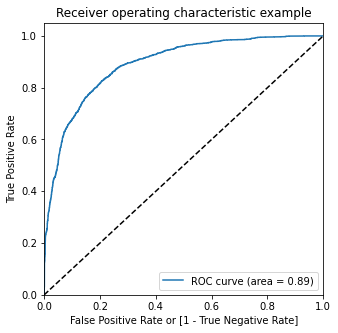

In [687]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.Churn_prob)


***Above we had chosen an arbitrary cut-off value of 0.6. We need to determine the best cut-off value and the below section deals with that:***

In [691]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Churn_prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.sample(10)

Churn  Churn_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  \
1844      0    0.038575          0    1    0    0    0    0    0    0    0   
2617      0    0.020527          0    1    0    0    0    0    0    0    0   
4077      1    0.358352          0    1    1    1    1    0    0    0    0   
1757      0    0.333568          0    1    1    1    1    0    0    0    0   
3051      0    0.508128          0    1    1    1    1    1    1    0    0   
2460      1    0.825887          1    1    1    1    1    1    1    1    1   
4291      1    0.228194          0    1    1    1    0    0    0    0    0   
5689      1    0.812307          1    1    1    1    1    1    1    1    1   
1369      0    0.216099          0    1    1    1    0    0    0    0    0   
1625      1    0.852818          1    1    1    1    1    1    1    1    1   

      0.8  0.9  
1844    0    0  
2617    0    0  
4077    0    0  
1757    0    0  
3051    0    0  
2460    1    0  
4291    0    0  
5689    1    0  
1369    0    0  
1625    1    0

In [692]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.500000  1.000000  0.000000
0.1   0.1  0.679719  0.978893  0.380545
0.2   0.2  0.743652  0.948608  0.538697
0.3   0.3  0.776690  0.917406  0.635974
0.4   0.4  0.803304  0.885898  0.720710
0.5   0.5  0.809575  0.826552  0.792597
0.6   0.6  0.806975  0.761089  0.852860
0.7   0.7  0.787397  0.669624  0.905170
0.8   0.8  0.739064  0.529826  0.948302
0.9   0.9  0.632915  0.277149  0.988682


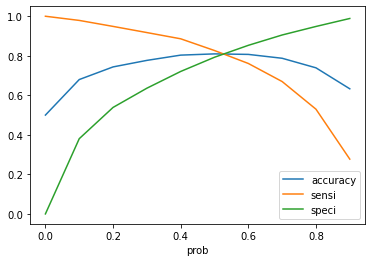

In [693]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [696]:
#### From the curve above, 0.55 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_Predicted'] = y_train_pred_final.Churn_prob.map( lambda x: 1 if x > 0.55 else 0)

y_train_pred_final.head()

Churn  Churn_prob  Predicted  0.0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  \
0      0    0.487090          0    1    1    1    1    1    0    0    0    0   
1      1    0.963036          1    1    1    1    1    1    1    1    1    1   
2      0    0.119931          0    1    1    0    0    0    0    0    0    0   
3      0    0.769093          1    1    1    1    1    1    1    1    1    0   
4      0    0.245599          0    1    1    1    0    0    0    0    0    0   

   0.9  final_Predicted  
0    0                0  
1    1                1  
2    0                0  
3    0                1  
4    0                0

In [698]:
y_train_pred_final['Churn_Score'] = y_train_pred_final.Churn_prob.map( lambda x: round(x*100))
y_train_pred_final[['Churn','Churn_prob','final_Predicted','Churn_Score']].head()

Churn  Churn_prob  final_Predicted  Churn_Score
0      0    0.487090                0           49
1      1    0.963036                1           96
2      0    0.119931                0           12
3      0    0.769093                1           77
4      0    0.245599                0           25

In [700]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_train_pred_final.Churn, y_train_pred_final.final_Predicted)

0.8075864178647905

In [701]:
confusion2 = metrics.confusion_matrix(y_train_pred_final.Churn, y_train_pred_final.final_Predicted )
confusion2

array([[2692,  577],
       [ 681, 2588]])

### PLOTTING ROC CURVE

In [702]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [703]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Churn, 
                                         y_train_pred_final.final_Predicted, drop_intermediate = False )


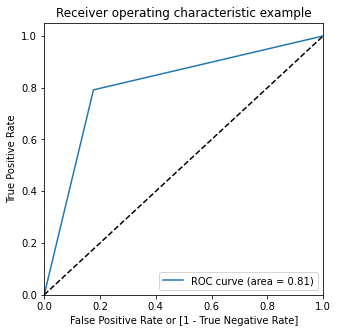

In [705]:
draw_roc(y_train_pred_final.Churn, y_train_pred_final.final_Predicted)

### Lets Check cross validation score and will see f1 score

In [734]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression

In [736]:
lr = LogisticRegression()
cross_val_scores = cross_val_score(lr, X_train_sm, y_train_sm, cv=5, scoring='f1')


In [737]:
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.74666667 0.83097543 0.81437126 0.81137725 0.81736527]
Mean accuracy: 0.8041511734535396


#### PREDICTIONS ON TEST SET

In [707]:
#scaling test set

scale =['WarehouseToHome','HourSpendOnApp','NumberOfDeviceRegistered','OrderAmountHikeFromlastYear','CouponUsed','OrderCount','DaySinceLastOrder','Tenure']

X_test[scale] = scaler.fit_transform(X_test[scale])

X_test.head()

Tenure  CityTier  WarehouseToHome Gender  HourSpendOnApp  \
5240  0.333333         3         0.033058      0            0.50   
1660  0.266667         1         0.066116      0            0.25   
2106  0.000000         1         0.123967      1            0.25   
4581  0.016667         1         0.214876      0            0.75   
566   0.216667         1         0.074380      1            0.25   

      NumberOfDeviceRegistered  SatisfactionScore  NumberOfAddress  Complain  \
5240                       0.6                  4               10         0   
1660                       0.4                  1                1         0   
2106                       0.4                  3                8         0   
4581                       0.8                  4                7         0   
566                        0.4                  4                9         1   

      OrderAmountHikeFromlastYear  ...  CashbackAmount  \
5240                     0.133333  ...             291   
1660                     0.533333  ...             125   
2106                     0.200000  ...             148   
4581                     0.400000  ...             150   
566                      0.200000  ...             136   

      PreferredLoginDevice_Phone  PreferredPaymentMode_Cash on Delivery  \
5240                           1                                      0   
1660                           0                                      0   
2106                           1                                      0   
4581                           1                                      1   
566                            0                                      0   

      PreferredPaymentMode_E wallet  PreferedOrderCat_Fashion  \
5240                              0                         0   
1660                              0                         0   
2106                              0                         0   
4581                              0                         0   
566                               0                         0   

      PreferedOrderCat_Grocery  PreferedOrderCat_Laptop & Accessory  \
5240                         1                                    0   
1660                         0                                    0   
2106                         0                                    1   
4581                         0                                    0   
566                          0                                    0   

      PreferedOrderCat_Mobile Phone  PreferedOrderCat_Phone  \
5240                              0                       0   
1660                              0                       1   
2106                              0                       0   
4581                              1                       0   
566                               1                       0   

      MaritalStatus_Married  
5240                      1  
1660                      0  
2106                      1  
4581                      1  
566                       1  

[5 rows x 23 columns]

In [709]:
X_test1 = X_test[col]
X_test1.head()

Tenure  WarehouseToHome  Complain  CouponUsed  OrderCount  \
5240  0.333333         0.033058         0    0.076923    0.333333   
1660  0.266667         0.066116         0    0.000000    0.000000   
2106  0.000000         0.123967         0    0.000000    0.000000   
4581  0.016667         0.214876         0    0.153846    0.066667   
566   0.216667         0.074380         1    0.000000    0.000000   

      DaySinceLastOrder  PreferedOrderCat_Fashion  PreferedOrderCat_Grocery  \
5240           0.064516                         0                         1   
1660           0.225806                         0                         0   
2106           0.000000                         0                         0   
4581           0.064516                         0                         0   
566            0.000000                         0                         0   

      PreferedOrderCat_Laptop & Accessory  PreferedOrderCat_Mobile Phone  \
5240                                    0                              0   
1660                                    0                              0   
2106                                    1                              0   
4581                                    0                              1   
566                                     0                              1   

      PreferedOrderCat_Phone  MaritalStatus_Married  
5240                       0                      1  
1660                       1                      0  
2106                       0                      1  
4581                       0                      1  
566                        0                      1

In [710]:
X_test_sm = sm.add_constant(X_test1)

In [711]:
y_test_pred = res.predict(X_test_sm)

In [712]:
y_test_pred[:10]

5240    0.011373
1660    0.058378
2106    0.218645
4581    0.438083
566     0.192875
689     0.432717
2346    0.300537
161     0.567352
871     0.756482
881     0.445089
dtype: float64

In [713]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [714]:
# Let's see the head
y_pred_1.head()

0
5240  0.011373
1660  0.058378
2106  0.218645
4581  0.438083
566   0.192875

In [715]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [716]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [717]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [718]:
y_pred_final.head()

Churn         0
0      0  0.011373
1      0  0.058378
2      1  0.218645
3      1  0.438083
4      0  0.192875

In [719]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Churn_prob'})

In [721]:
# Rearranging the columns
y_pred_final = y_pred_final[['Churn','Churn_prob']]
y_pred_final['Churn_prob_score'] = y_pred_final.Churn_prob.map( lambda x: round(x*100))
# Let's see the head of y_pred_final
y_pred_final.head()

Churn  Churn_prob  Churn_prob_score
0      0    0.011373                 1
1      0    0.058378                 6
2      1    0.218645                22
3      1    0.438083                44
4      0    0.192875                19

In [726]:
y_pred_final['final_Predicted'] = y_pred_final.Churn_prob.map(lambda x: 1 if x > 0.55 else 0)
y_pred_final.sample(10)


Churn  Churn_prob  Churn_prob_score  final_Predicted
371       0    0.029029                 3                0
1506      0    0.020794                 2                0
349       0    0.228237                23                0
414       0    0.000408                 0                0
1048      0    0.001560                 0                0
300       0    0.085523                 9                0
1119      0    0.022586                 2                0
698       0    0.530179                53                0
84        0    0.417415                42                0
514       0    0.028951                 3                0

In [727]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Churn, y_pred_final.final_Predicted)

0.8354055654233274

In [729]:
confusion2 = metrics.confusion_matrix(y_pred_final.Churn, y_pred_final.final_Predicted )
confusion2

array([[1258,  155],
       [ 123,  153]])

### Lets Check cross validation score and will see accuracy score

In [742]:
cross_val_scores = cross_val_score(lr, X_test_sm, y_test, cv=5, scoring='accuracy')

In [744]:
print("Cross-validation scores:", cross_val_scores)
print("Mean accuracy:", np.mean(cross_val_scores))

Cross-validation scores: [0.85798817 0.86390533 0.86982249 0.86390533 0.8694362 ]
Mean accuracy: 0.8650115007111128


## DecisionTree

In [745]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt = DecisionTreeClassifier(random_state=42)

### Hyper-parameter tuning

In [746]:
# Create the parameter grid based on the results of random search 
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    
    
}

In [747]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=5, n_jobs=-1)

In [748]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]})

### DT model evaluation

In [749]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [750]:
grid_search.best_score_

0.8949238578680203

In [751]:
cv_df = pd.DataFrame(grid_search.cv_results_)

In [752]:
cv_df.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.098981      0.031791         0.015075        0.006708   
1       0.035422      0.007325         0.016934        0.012080   
2       0.078363      0.034403         0.010490        0.002197   
3       0.055449      0.021617         0.019662        0.009707   
4       0.065997      0.021721         0.013155        0.006877   

  param_max_depth param_min_samples_leaf  \
0               2                      5   
1               2                     10   
2               2                     20   
3               2                     50   
4               2                    100   

                                      params  split0_test_score  \
0    {'max_depth': 2, 'min_samples_leaf': 5}           0.859137   
1   {'max_depth': 2, 'min_samples_leaf': 10}           0.859137   
2   {'max_depth': 2, 'min_samples_leaf': 20}           0.859137   
3   {'max_depth': 2, 'min_samples_leaf': 50}           0.859137   
4  {'max_depth': 2, 'min_samples_leaf': 100}           0.859137   

   split1_test_score  split2_test_score  split3_test_score  split4_test_score  \
0           0.869289           0.848985           0.869289            0.88198   
1           0.869289           0.848985           0.869289            0.88198   
2           0.869289           0.848985           0.869289            0.88198   
3           0.869289           0.848985           0.869289            0.88198   
4           0.869289           0.848985           0.869289            0.88198   

   mean_test_score  std_test_score  rank_test_score  
0         0.865736        0.011075               21  
1         0.865736        0.011075               21  
2         0.865736        0.011075               21  
3         0.865736        0.011075               21  
4         0.865736        0.011075               21

In [753]:
cv_df.sort_values(by='rank_test_score').head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
15       0.114200      0.036434         0.017967        0.009366   
20       0.046495      0.003563         0.010359        0.004102   
16       0.097048      0.070134         0.019953        0.009486   
12       0.073300      0.015014         0.031045        0.017021   
21       0.043801      0.003238         0.007865        0.001376   

   param_max_depth param_min_samples_leaf  \
15              10                      5   
20              20                      5   
16              10                     10   
12               5                     20   
21              20                     10   

                                       params  split0_test_score  \
15   {'max_depth': 10, 'min_samples_leaf': 5}           0.895939   
20   {'max_depth': 20, 'min_samples_leaf': 5}           0.894670   
16  {'max_depth': 10, 'min_samples_leaf': 10}           0.881980   
12   {'max_depth': 5, 'min_samples_leaf': 20}           0.893401   
21  {'max_depth': 20, 'min_samples_leaf': 10}           0.881980   

    split1_test_score  split2_test_score  split3_test_score  \
15           0.904822           0.885787           0.892132   
20           0.907360           0.885787           0.889594   
16           0.890863           0.874365           0.880711   
12           0.889594           0.855330           0.895939   
21           0.887056           0.874365           0.880711   

    split4_test_score  mean_test_score  std_test_score  rank_test_score  
15           0.895939         0.894924        0.006186                1  
20           0.897208         0.894924        0.007374                1  
16           0.885787         0.882741        0.005479                3  
12           0.879442         0.882741        0.014812                4  
21           0.885787         0.881980        0.004469                5

In [755]:
sel_cols = ['param_max_depth','param_min_samples_leaf','params', 'rank_test_score',  'mean_test_score']

In [756]:
cv_df.sort_values(by='rank_test_score')[sel_cols].head(20)

param_max_depth param_min_samples_leaf  \
15              10                      5   
20              20                      5   
16              10                     10   
12               5                     20   
21              20                     10   
10               5                      5   
11               5                     10   
18              10                     50   
23              20                     50   
13               5                     50   
22              20                     20   
17              10                     20   
5                3                      5   
6                3                     10   
7                3                     20   
8                3                     50   
19              10                    100   
24              20                    100   
9                3                    100   
14               5                    100   

                                        params  rank_test_score  \
15    {'max_depth': 10, 'min_samples_leaf': 5}                1   
20    {'max_depth': 20, 'min_samples_leaf': 5}                1   
16   {'max_depth': 10, 'min_samples_leaf': 10}                3   
12    {'max_depth': 5, 'min_samples_leaf': 20}                4   
21   {'max_depth': 20, 'min_samples_leaf': 10}                5   
10     {'max_depth': 5, 'min_samples_leaf': 5}                6   
11    {'max_depth': 5, 'min_samples_leaf': 10}                7   
18   {'max_depth': 10, 'min_samples_leaf': 50}                8   
23   {'max_depth': 20, 'min_samples_leaf': 50}                8   
13    {'max_depth': 5, 'min_samples_leaf': 50}                8   
22   {'max_depth': 20, 'min_samples_leaf': 20}               11   
17   {'max_depth': 10, 'min_samples_leaf': 20}               11   
5      {'max_depth': 3, 'min_samples_leaf': 5}               13   
6     {'max_depth': 3, 'min_samples_leaf': 10}               13   
7     {'max_depth': 3, 'min_samples_leaf': 20}               13   
8     {'max_depth': 3, 'min_samples_leaf': 50}               16   
19  {'max_depth': 10, 'min_samples_leaf': 100}               17   
24  {'max_depth': 20, 'min_samples_leaf': 100}               17   
9    {'max_depth': 3, 'min_samples_leaf': 100}               17   
14   {'max_depth': 5, 'min_samples_leaf': 100}               17   

    mean_test_score  
15         0.894924  
20         0.894924  
16         0.882741  
12         0.882741  
21         0.881980  
10         0.881472  
11         0.880711  
18         0.878173  
23         0.878173  
13         0.878173  
22         0.874365  
17         0.874365  
5          0.872589  
6          0.872589  
7          0.872589  
8          0.871320  
19         0.870305  
24         0.870305  
9          0.870305  
14         0.870305

In [757]:
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [758]:
dt_best = grid_search.best_estimator_

In [759]:
y_train_pred = dt_best.predict(X_train)

In [760]:
y_test_pred = dt_best.predict(X_test)

In [761]:
print(classification_report(y_train,dt_best.predict(X_train)))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3269
           1       0.88      0.81      0.84       671

    accuracy                           0.95      3940
   macro avg       0.92      0.89      0.91      3940
weighted avg       0.95      0.95      0.95      3940



In [763]:
print(classification_report(y_test,dt_best.predict(X_test)))

              precision    recall  f1-score   support

           0       0.93      0.91      0.92      1413
           1       0.58      0.63      0.61       276

    accuracy                           0.87      1689
   macro avg       0.75      0.77      0.76      1689
weighted avg       0.87      0.87      0.87      1689



In [764]:
accuracy_score(y_train, y_train_pred)

0.948477157360406

In [765]:
accuracy_score(y_test, y_test_pred)

0.8656009473060983

In [766]:
from sklearn.model_selection import cross_val_score

In [769]:
cross_val_scores=cross_val_score(dt_best, X_train, y_train, cv=5, n_jobs=-1,scoring='f1')

In [770]:
np.mean(cross_val_scores)

0.6753990531112903

[Text(0.47443804824561403, 0.9545454545454546, 'x[0] <= 0.025\ngini = 0.283\nsamples = 3940\nvalue = [3269, 671]'),
 Text(0.2574470029239766, 0.8636363636363636, 'x[8] <= 0.5\ngini = 0.499\nsamples = 830\nvalue = [396, 434]'),
 Text(0.14839181286549707, 0.7727272727272727, 'x[7] <= 5.5\ngini = 0.48\nsamples = 516\nvalue = [310, 206]'),
 Text(0.08771929824561403, 0.6818181818181818, 'x[12] <= 0.033\ngini = 0.447\nsamples = 418\nvalue = [277, 141]'),
 Text(0.03216374269005848, 0.5909090909090909, 'x[6] <= 2.5\ngini = 0.491\nsamples = 113\nvalue = [49, 64]'),
 Text(0.011695906432748537, 0.5, 'x[14] <= 0.5\ngini = 0.444\nsamples = 30\nvalue = [20, 10]'),
 Text(0.005847953216374269, 0.4090909090909091, 'gini = 0.0\nsamples = 11\nvalue = [11, 0]'),
 Text(0.017543859649122806, 0.4090909090909091, 'x[13] <= 136.5\ngini = 0.499\nsamples = 19\nvalue = [9, 10]'),
 Text(0.011695906432748537, 0.3181818181818182, 'x[20] <= 0.5\ngini = 0.32\nsamples = 10\nvalue = [2, 8]'),
 Text(0.005847953216374269,

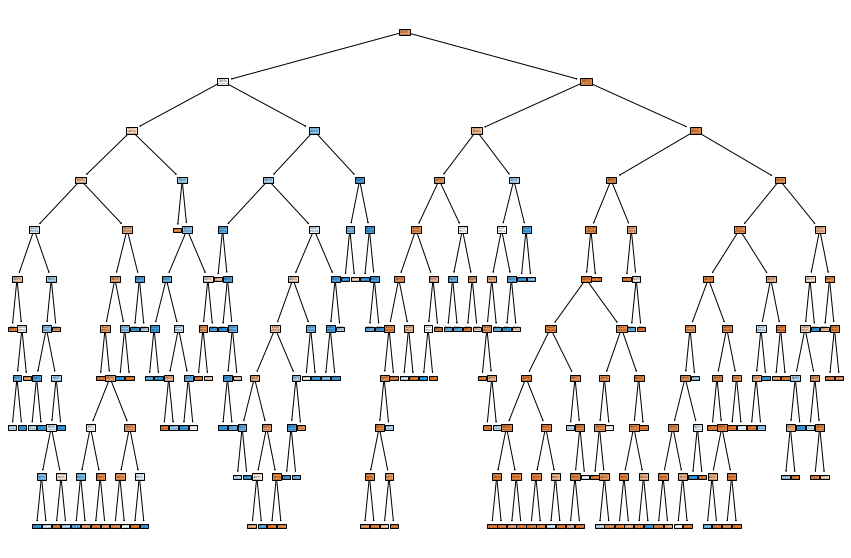

In [771]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_best,filled=True)

## Random forest

In [772]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, n_estimators=50, oob_score=True)
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50, oob_score=True, random_state=42)

#### Performance on the train set

In [773]:
y_train_pred = rf.predict(X_train)

In [774]:
accuracy_score(y_train, y_train_pred)

1.0

#### Performance on unseen data

In [775]:
y_test_pred = rf.predict(X_test)

In [776]:
accuracy_score(y_test, y_test_pred)

0.9265837773830669

In [777]:
rf.oob_score_

0.9459390862944163

#### Model evaluation: Cross validation

In [778]:
cross_val_score=cross_val_score(rf, X_train, y_train, cv=5, n_jobs=-1,scoring='f1')

In [779]:
print(cross_val_score)
print(np.mean(cross_val_score))

[0.8442623  0.81702128 0.7219917  0.82845188 0.81512605]
0.8053706412375764


### Hyper-parameter tuning using GridSearchCV

In [780]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rf = RandomForestClassifier(random_state=42, n_jobs=-1)

In [781]:
hyper_params = {'max_depth': [3, 5, 10, 15, 20],
                'max_features': [5, 10, 15, 20, 25],
               }

In [793]:
model_cv = GridSearchCV(estimator=rf, 
             param_grid=hyper_params,
             verbose=1,scoring='f1',
             cv=5,
             n_jobs=-1)

In [794]:
model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [3, 5, 10, 15, 20],
                         'max_features': [5, 10, 15, 20, 25]},
             scoring='f1', verbose=1)

In [795]:
model_cv.best_score_


0.8394320040314339

In [796]:
model_cv.best_estimator_


RandomForestClassifier(max_depth=20, max_features=25, n_jobs=-1,
                       random_state=42)

In [797]:
rf_best1 = model_cv.best_estimator_


In [798]:
y_test_pred = rf_best1.predict(X_test)


In [799]:
accuracy_score(y_test, y_test_pred)

0.9283599763173476

In [800]:
print(classification_report(y_train, rf_best1.predict(X_train)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3269
           1       1.00      1.00      1.00       671

    accuracy                           1.00      3940
   macro avg       1.00      1.00      1.00      3940
weighted avg       1.00      1.00      1.00      3940



In [801]:
print(classification_report(y_test, rf_best1.predict(X_test)))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      1413
           1       0.83      0.70      0.76       276

    accuracy                           0.93      1689
   macro avg       0.89      0.84      0.86      1689
weighted avg       0.93      0.93      0.93      1689



- **From above 3 model will choose Random forest**
- **As Mention in problem Statement we kept f1 score as scoring metric and we got almost good result for 3 models**